<a href="https://colab.research.google.com/github/chillburg/thesis/blob/master/Pre-processing%20and%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title Controls

####################################################################
# Running controls

## Number of observations in the sample ('all' to read the whole dataset):
sample_size = 100000
#@markdown set a number or type "all" for the whole dataset

## Removal of non-matured loans 
remove_non_mat = 'no'   #(options: 'all', 'leave almost matured' or 'no')

## Save the file?
save = False

## Calculate correlations?
calculate_corrs = False

## Remove outliers? If yes, how many standard devs from mean?
remove_outliers = False
st_dev = 4

####################################################################

sample_size = "all" #@param ["all"] {allow-input: true}
if sample_size != 'all':
    sample_size = int(sample_size)

remove_non_mat = "all" #@param ["all", "no", "leave almost matured"]
calculate_corrs = False #@param {type:"boolean"}
remove_outliers = True #@param {type:"boolean"}
st_dev =  4#@param {type:"integer"}
save = False #@param {type:"boolean"}


# full data ~ 2.26 mio obs

In [0]:
# ####################################################################
# # Running controls

# ## Number of observations in the sample ('all' to read the whole dataset):
# sample_size = 100000

# ## Removal of non-matured loans 
# remove_non_mat = 'no'   #(options: 'all' or 'leave almost matured')

# ## Save the file?
# save = False

# ## Calculate correlations?
# calculate_corrs = False

# ## Remove outliers? If yes, how many standard devs from mean?
# remove_outliers = False
# st_dev = 4

# ####################################################################

# # full data ~ 2.26 mio obs

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
import time
import random

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('expand_frame_repr', True)
# pd.set_option('max_colwidth', 40)
# pd.reset_option('max_colwidth')

# Play an audio sound
from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
def beep():
    output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/5/56/Aplausos.ogg").play()')

start = time.time()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [0]:
def pd_read(filename, rows = 'all'):
    if rows == 'all':
        df = pd.read_csv(filename, encoding='latin-1')
    else:
        n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
        skip = sorted(random.sample(range(1,n+1), n-rows)) #the 0-indexed header will not be included in the skip list
        df = pd.read_csv(filename, skiprows=skip, encoding='latin-1', low_memory=False)
    return df

%time loan_data_raw = pd_read("/content/drive/My Drive/AAA THESIS/Data/accepted_2007_to_2018Q4.csv", sample_size)
loan_data0 = loan_data_raw.copy()
print(loan_data_raw.shape)  # (2260701, 151)

/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py:188: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


CPU times: user 39.9 s, sys: 8.56 s, total: 48.4 s
Wall time: 56.2 s
(2260701, 151)


In [0]:
# create a description file
data_dict = pd.read_excel("/content/drive/My Drive/AAA THESIS/LCDataDictionary.xlsx", encoding='latin-1')
data_dict.iloc[110, 0] = "total_rev_hi_lim"
data_dict.iloc[113, 0] = "verification_status_joint"
data_dict.columns = ["Variable", "Description"]

loan_data_cols = pd.DataFrame(loan_data_raw.columns, columns = ["Variable"])
description = pd.merge(loan_data_cols, data_dict, how = "right", on = "Variable").dropna().reset_index()
# #printing
# description.to_excel("description.xlsx")
description

,index,Variable,Description
0,0,id,A unique LC assigned ID for the loan listing.
1,1,member_id,A unique LC assigned Id for the borrower member.
2,2,loan_amnt,The listed amount of the loan applied for by t...
3,3,funded_amnt,The total amount committed to that loan at tha...
4,4,funded_amnt_inv,The total amount committed by investors for th...
5,5,term,The number of payments on the loan. Values are...
6,6,int_rate,Interest Rate on the loan
7,7,installment,The monthly payment owed by the borrower if th...
8,8,grade,LC assigned loan grade
9,9,sub_grade,LC assigned loan subgrade


# Removing unnecessary observations and features

In [0]:
features_to_be_removed = []
# removing non-informative variables
for var in ['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'policy_code', 'desc']:
    if var in loan_data_raw.columns:
        # print('As non-informative, removed: ', var)
        features_to_be_removed.extend([var])
print('Total as non-inf: ', features_to_be_removed)

# removing too hard to use variables
features_to_be_removed.extend(['emp_title', 'zip_code'])

# removing data leaks (variables which can't be observed before issuing the loan and which point to who will default)
features_to_be_removed.extend(loan_data0.loc[1, 'out_prncp':'last_credit_pull_d'].reset_index()['index'])
features_to_be_removed.extend(loan_data0.loc[1, "hardship_flag":"hardship_last_payment_amount"].reset_index()['index'])
features_to_be_removed.extend(loan_data0.loc[1, "debt_settlement_flag":"settlement_term"].reset_index()['index'])
features_to_be_removed.extend(['pymnt_plan', 'last_fico_range_high', "last_fico_range_low"])

# also drop variables that are same for all observations
%time unique = loan_data0.apply(pd.Series.nunique, axis = 0)

for var in unique.index:
    if unique[var] == 1:
        print('as non-unque, removed: ', var)
        features_to_be_removed.append(var)

print('Feature number to remove:', len(features_to_be_removed), features_to_be_removed)

for var in list(set(features_to_be_removed)):
    if var in loan_data0.columns:
        loan_data0 = loan_data0.drop(var, axis = 1)

features_to_be_removed = []
loan_data0.shape
loan_data0

Total as non-inf:  ['id', 'member_id', 'url', 'title', 'policy_code', 'desc']
CPU times: user 46.5 s, sys: 12.1 s, total: 58.6 s
Wall time: 58.6 s
as non-unque, removed:  policy_code
as non-unque, removed:  hardship_type
as non-unque, removed:  deferral_term
as non-unque, removed:  hardship_length
Feature number to remove: 50 ['id', 'member_id', 'url', 'title', 'policy_code', 'desc', 'emp_title', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'd

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,"3,600.00","3,600.00","3,600.00",36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,"55,000.00",Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,nan,7.00,0.00,"2,765.00",29.70,13.00,w,0.00,30.00,Individual,nan,nan,NaN,0.00,722.00,"144,904.00",2.00,2.00,0.00,1.00,21.00,"4,981.00",36.00,3.00,3.00,722.00,34.00,"9,300.00",3.00,1.00,4.00,4.00,"20,701.00","1,506.00",37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,"178,050.00","7,746.00","2,400.00","13,734.00",nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash
1,"24,700.00","24,700.00","24,700.00",36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,"65,000.00",Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,nan,22.00,0.00,"21,470.00",19.20,38.00,w,0.00,nan,Individual,nan,nan,NaN,0.00,0.00,"204,396.00",1.00,1.00,0.00,1.00,19.00,"18,005.00",73.00,2.00,3.00,"6,472.00",29.00,"111,800.00",0.00,0.00,6.00,4.00,"9,733.00","57,830.00",27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,nan,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,"314,017.00","39,475.00","79,300.00","24,667.00",nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash
2,"20,000.00","20,000.00","20,000.00",60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,"63,000.00",Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,0.00,Aug-2000,695.00,699.00,0.00,nan,nan,6.00,0.00,"7,869.00",56.20,18.00,w,0.00,nan,Joint App,"71,000.00",13.85,Not Verified,0.00,0.00,"189,699.00",0.00,1.00,0.00,4.00,19.00,"10,827.00",73.00,0.00,2.00,"2,081.00",65.00,"14,000.00",2.00,5.00,1.00,6.00,"31,617.00","2,737.00",55.90,0.00,0.00,125.00,184.00,14.00,14.00,5.00,101.00,nan,10.00,nan,0.00,2.00,3.00,2.00,4.00,6.00,4.00,7.00,3.00,6.00,0.00,0.00,0.00,0.00,100.00,50.00,0.00,0.00,"218,418.00","18,696.00","6,200.00","14,877.00",nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash
3,"35,000.00","35,000.00","35,000.00",60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,"110,000.00",Source Verified,Dec-2015,Current,debt_consolidation,NJ,17.06,0.00,Sep-2008,785.00,789.00,0.00,nan,nan,13.00,0.00,"7,802.00",11.60,17.00,w,0.00,nan,Individual,nan,nan,NaN,0.00,0.0

In [0]:
#converting dates to standard format to calculater maturity
loan_data0 = loan_data0.dropna(subset = ['issue_d', 'earliest_cr_line'])
for var in ['issue_d', 'earliest_cr_line']:
    if not loan_data0.dtypes[var]  in ['float64','float32','int64', "int32"]:
        loan_data0[var] = [datetime.strptime(x, '%b-%Y').date() for x in loan_data0[var]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

  matured        term     issue_d  loan_amnt
0       y   36 months  2015-12-01   3,600.00
1       y   36 months  2015-12-01  24,700.00
2       n   60 months  2015-12-01  20,000.00
3       n   60 months  2015-12-01  35,000.00
4       n   60 months  2015-12-01  10,400.00

The distribution of matured loans and non-matured:
All           2,260,701
Non-matured   1,584,209
Matured       676,430


Text(0.5, 1.0, 'Matured loans versus all loans')

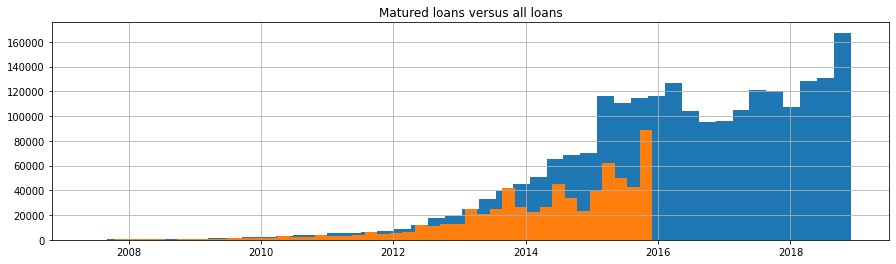

In [0]:
# separating matured loans from non-matured
report_date = datetime.strptime('Dec-2018', '%b-%Y').date() #loan_data0.issue_d.max()  # 2018-12
loan_data0['matured'] = 'n'
# if the clients have 6 months till maturity of 3-year loans or 1 year till maturity of 5-year loans, they are marked as 'almost'
# loan_data0.matured[loan_data0.issue_d + loan_data_raw.term.str.strip().replace(['36 months', '60 months'], [relativedelta(months = 30), relativedelta(months = 48)]) <= report_date] = 'almost'

# the loans that have laready matured, are marked as 'y', remaining loans remain as 'n'
loan_data0.matured[loan_data0.issue_d + loan_data_raw.term.str.strip().replace(['36 months', '60 months'], [relativedelta(months = 36), relativedelta(months = 60)]) <= report_date] = 'y'

print(loan_data0.loc[:, ['matured', 'term', 'issue_d', 'loan_amnt']].head(5))

loan_data0['issue_d'].hist(bins=45, figsize= (15, 4))


print('\nThe distribution of matured loans and non-matured:\nAll           {:,.0f}\nNon-matured   {:,.0f}\nMatured       {:,.0f}'.format(loan_data_raw.shape[0], 
                                                                                            loan_data0['matured'].value_counts()[0],
                                                                                            loan_data0['matured'].value_counts()[1]))

if remove_non_mat == 'all':
    loan_data0 = loan_data0[loan_data0['matured'] == 'y']
elif remove_non_mat == 'leave almost matured':
    loan_data0 = loan_data0[loan_data0['matured'] != 'n']

loan_data0[loan_data0['matured'] == 'y'].issue_d.hist(bins=45)
plt.title("Matured loans versus all loans")


0


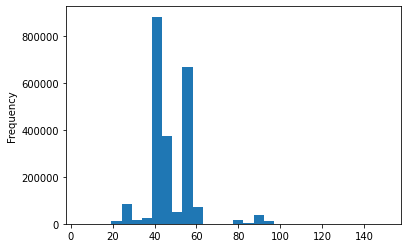

In [0]:
# drop observations with NAs > 80
loan_data_raw.isnull().sum(axis=1).plot.hist(bins = 30)
print((loan_data0.isnull().sum(axis=1)>80).sum())

loan_data0 = loan_data0[loan_data0.isnull().sum(axis=1)<80]

In [0]:
# turning discrete variables to categories

# loading the file where stated how each of the discrete variables should be transformed
mv_types = pd.read_excel("/content/drive/My Drive/AAA THESIS/missing_value_types.xlsx", encoding='latin-1')

for var in mv_types.name:
    # impute "zero" because standard imputer will place '0'
    if int(mv_types.loc[mv_types['name'] == var, 'imputation'] == 'zero') == 1:
        # except for these variables, they remain numeric
        if var not in ['mths_since_last_delinq', 'mths_since_last_major_derog', 'open_act_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq','percent_bc_gt_75']:
            loan_data0[var + '_cat'] = loan_data0[var].replace(np.nan, 'zero')
        
    if int(mv_types.loc[mv_types['name'] == var, 'to_cat'] == '0, 1+') == 1:
        print(var  + '_cat', '0, 1+')
        loan_data0.loc[loan_data_raw[var] == 0, var + '_cat'] = 'zero'
        loan_data0.loc[loan_data_raw[var] >= 1, var + '_cat'] = '1+'
    elif int(mv_types.loc[mv_types['name'] == var, 'to_cat'] == '0, 1, 2+') == 1:
        print(var + '_cat', '0, 1, 2+')
        loan_data0.loc[loan_data_raw[var] == 0, var + '_cat'] = 'zero'
        loan_data0.loc[loan_data_raw[var] == 1, var + '_cat'] = 'one'
        loan_data0.loc[loan_data_raw[var] >= 2, var + '_cat'] = '2+'
    elif int(mv_types.loc[mv_types['name'] == var, 'to_cat'] == '0, 1-2, 3+') == 1:
        print(var + '_cat', '0, 1-2, 3+')
        loan_data0.loc[loan_data_raw[var] == 0, var + '_cat'] = 'zero'
        loan_data0.loc[loan_data_raw[var] == 1, var + '_cat'] = '1-2'
        loan_data0.loc[loan_data_raw[var] == 2, var + '_cat'] = '1-2'
        loan_data0.loc[loan_data_raw[var] >= 3, var + '_cat'] = '3+'
    elif int(mv_types.loc[mv_types['name'] == var, 'to_cat'] == '0, 1, 2, 3+') == 1:
        print(var + '_cat', '0, 1-2, 3+')
        loan_data0.loc[loan_data_raw[var] == 0, var + '_cat'] = 'zero'
        loan_data0.loc[loan_data_raw[var] == 1, var + '_cat'] = 'one'
        loan_data0.loc[loan_data_raw[var] == 2, var + '_cat'] = 'two'
        loan_data0.loc[loan_data_raw[var] >= 3, var + '_cat'] = '3+'

delinq_2yrs_cat 0, 1-2, 3+
inq_last_6mths_cat 0, 1-2, 3+
pub_rec_cat 0, 1-2, 3+
collections_12_mths_ex_med_cat 0, 1+
acc_now_delinq_cat 0, 1+
tot_coll_amt_cat 0, 1+
open_acc_6m_cat 0, 1-2, 3+
open_il_12m_cat 0, 1, 2+
open_il_24m_cat 0, 1, 2+
open_rv_12m_cat 0, 1, 2+
inq_fi_cat 0, 1, 2+
total_cu_tl_cat 0, 1-2, 3+
inq_last_12m_cat 0, 1-2, 3+
chargeoff_within_12_mths_cat 0, 1+
delinq_amnt_cat 0, 1+
mort_acc_cat 0, 1-2, 3+
num_accts_ever_120_pd_cat 0, 1, 2+
num_tl_120dpd_2m_cat 0, 1+
num_tl_30dpd_cat 0, 1+
num_tl_90g_dpd_24m_cat 0, 1+
pub_rec_bankruptcies_cat 0, 1+
tax_liens_cat 0, 1+


In [0]:
# inspired by https://rstudio-pubs-static.s3.amazonaws.com/115829_32417d32dbce41eab3eeaf608a0eef9d.html

# Filtering out the entries where fico_range_high or fico_range_low < 640
print(loan_data0[loan_data0.fico_range_high == 0].shape)  # 15 observations
old_shape = loan_data0.shape[0]
loan_data0 = loan_data0[loan_data0.fico_range_high >= 640]
loan_data0 = loan_data0[loan_data0.fico_range_low >= 640]
print('Removed observations:\n', old_shape - loan_data0.shape[0],', remaining: ',  loan_data0.shape[0])

(0, 129)
Removed observations:
 17 , remaining:  676413


In [0]:
# # Removing the loans with zero revol_util
# print(loan_data0[loan_data0.revol_util == 0].shape)
# old_shape = loan_data0.shape[0]
# loan_data0 = loan_data0[loan_data0.revol_util > 0]
# print('Removed observations:\n', old_shape - loan_data0.shape[0],', remaining: ',  loan_data0.shape[0])

In [0]:
# Removing the loans with zero annual_inc
print(loan_data0[loan_data0.annual_inc == 0].shape)
old_shape = loan_data0.shape[0]
loan_data0 = loan_data0[loan_data0.annual_inc > 0]
print('Removed observations:\n', old_shape - loan_data0.shape[0],', remaining: ',  loan_data0.shape[0])

(2, 129)
Removed observations:
 2 , remaining:  676411


In [0]:
# removing loans with loan_status: Does not meet the credit policy
# print(loan_data0.loan_status.filter(regex = "Does not meet the credit policy").shape)

loan_data0[loan_data0.loan_status.str.contains('Does not meet the credit policy')].shape # 117 observations
old_shape = loan_data0.shape[0]
loan_data0 = loan_data0[-loan_data0.loan_status.str.contains('Does not meet the credit policy')]
print('Removed observations:\n', old_shape - loan_data0.shape[0], ', remaining: ', loan_data0.shape[0])

Removed observations:
 2705 , remaining:  673706


In [0]:
# creating a variable cred_hist for length of credit history
loan_data_raw['cred_hist'] = loan_data0['cred_hist'] = (loan_data0.issue_d - loan_data0.earliest_cr_line).dt.days/30
loan_data0 = loan_data0.drop(columns= ['issue_d', 'earliest_cr_line'])

In [0]:
# creating loan-to-income and annual-installment-to-income for Bastani model
loan_data_raw['loan_to_inc'] = loan_data0['loan_to_inc'] = loan_data0.loan_amnt / loan_data0.annual_inc
loan_data_raw['inst_to_inc'] = loan_data0['inst_to_inc'] = loan_data0.installment*12 / loan_data0.annual_inc

# replace infinity due to zero income
loan_data0 = loan_data0.replace([np.inf, -np.inf], np.nan)#.dropna(subset=["loan_to_inc", "inst_to_inc"], how="all")
loan_data_raw = loan_data0.replace([np.inf, -np.inf], np.nan)

## Removing outliers

In [0]:
# removing outliers
# not all outliers need to be removed - f.e. number of derogatory public records - but clipped to a certain value (for later work)

def outlier_removal(var, std = 3, print_out = True, graphs = False):
    
    if var == ['term_num', 'emp_len']:
        print('not changing ', var)
        return(loan_data0[var])

    if var in ['loan_to_inc']:
        print('hard-trimming to 3 ', var)
        return loan_data0[var].clip(upper = 1.5)

    if var in ['inst_to_inc']:
        print('hard-trimming to 1.5 ', var)
        return loan_data0[var].clip(upper = 0.6)
    
    values = cleaned = loan_data_raw[var].copy()

    outliers = abs(values - values.mean()) - values.std()*std
    print('Share of outliers is: {} for {}'.format(round(outliers[outliers>0].count()/loan_data0.shape[0],2), var, outliers[outliers>0].count()))
    if print_out == True:
        print(values.describe())
        print()
    # cleaned[abs(values - values.std()) - values.std()*std > 0] = np.nan
    cleaned = cleaned.clip(upper = values.mean() + std * values.std(), lower = values.mean() - std * values.std())
    # print stats of the variable before and after
    if print_out == True:
        print('Without outliers:')
        print(cleaned.describe())
    # graph changes in distribution
    if graphs == True:
        plt.figure(figsize=(30, 4))
        plt.subplot(1, 2, 1)
        loan_data_raw[var].plot.hist(bins = 200, title='Raw distribution of {} values'.format(var))

        plt.subplot(1, 2, 2)
        cleaned.plot.hist(bins = 200, title='Distribution of {} values w/o outliers'.format(var))

    return(cleaned)

for col_name in loan_data0.columns:
    #print(col_name, loan_data0.dtypes[col_name])
    if (loan_data0.dtypes[col_name]  in ['float64','float32','int64', "int32"]) & (remove_outliers == True):
        loan_data0[col_name] = outlier_removal(col_name, print_out = 0, graphs = 0, std = st_dev)

Share of outliers is: 0.0 for loan_amnt
Share of outliers is: 0.0 for funded_amnt
Share of outliers is: 0.0 for funded_amnt_inv
Share of outliers is: 0.0 for int_rate
Share of outliers is: 0.0 for installment
Share of outliers is: 0.0 for annual_inc
Share of outliers is: 0.0 for dti
Share of outliers is: 0.01 for delinq_2yrs
Share of outliers is: 0.0 for fico_range_low
Share of outliers is: 0.0 for fico_range_high
Share of outliers is: 0.01 for inq_last_6mths
Share of outliers is: 0.0 for mths_since_last_delinq
Share of outliers is: 0.0 for mths_since_last_record
Share of outliers is: 0.0 for open_acc
Share of outliers is: 0.01 for pub_rec
Share of outliers is: 0.01 for revol_bal
Share of outliers is: 0.0 for revol_util
Share of outliers is: 0.0 for total_acc
Share of outliers is: 0.01 for collections_12_mths_ex_med
Share of outliers is: 0.0 for mths_since_last_major_derog
Share of outliers is: 0.0 for annual_inc_joint
Share of outliers is: 0.0 for dti_joint
Share of outliers is: 0.0 f

In [0]:
# print(loan_data.annual_inc.describe())
# loan_data.annual_inc.mean()+loan_data.annual_inc.std()*4
# # outliers

NameError: ignored

In [0]:
# add a variable with reduced number of emp_length categories

loan_data0['emp_length'] = loan_data0.emp_length.replace(["zero", "< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", '10+ years'], [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
loan_data0['emp_length_cat_reduced'] = loan_data0.emp_length_cat.replace(["zero", "< 1 year", "1 year"], '< 2 years').replace(["2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years"], '2-9 years')

# Missing Value Imputation

In this section I simply filled NAs with means/modes/zeros/max. Later we can try multiple imputation to increase accuracy. Inspired by LendingClub Loan Default and Profitability Prediction by Peiqian Li and Gao Han, Stanford.

In [0]:
loan_data_mv = loan_data0.copy()

NA_table = pd.merge((loan_data_mv.isnull().sum(axis = 0)/loan_data_mv.shape[0]).sort_values(ascending = False).to_frame('missing_value_share').reset_index(), 
                            loan_data_mv.dtypes.to_frame('feature_type').reset_index(), 
                            how = 'inner', on = 'index')

# drop features which have too many missing values
lots_of_NA = list(NA_table.loc[NA_table['missing_value_share'] > 0.85, 'index'])
loan_data_mv = loan_data_mv.drop(lots_of_NA, axis = 1)

NA_table = pd.merge((loan_data_mv.isnull().sum(axis = 0)/loan_data_mv.shape[0]).sort_values(ascending = False).to_frame('missing_value_share').reset_index(), 
                            loan_data_mv.dtypes.to_frame('feature_type').reset_index(), 
                            how = 'inner', on = 'index')

print('Shape of the original dataset: ', loan_data0.shape, '\nShape of the dataset:          ', loan_data_mv.shape)
NA_table

Shape of the original dataset:  (673706, 131) 
Shape of the dataset:           (673706, 101)


,index,missing_value_share,feature_type
0,mths_since_last_record,0.85,float64
1,mths_since_recent_bc_dlq,0.77,float64
2,mths_since_last_major_derog,0.75,float64
3,mths_since_recent_revol_delinq,0.68,float64
4,mths_since_last_delinq,0.52,float64
5,mths_since_recent_inq,0.17,float64
6,mo_sin_old_il_acct,0.13,float64
7,num_tl_120dpd_2m,0.13,float64
8,pct_tl_nvr_dlq,0.10,float64
9,avg_cur_bal,0.10,float64


In [0]:
# importing file with types
mv_types = pd.read_excel("/content/drive/My Drive/AAA THESIS/missing_value_types.xlsx", encoding='latin-1')

# imputing missing values
for var in loan_data_mv.columns:
    if var in ['emp_length_cat', 'emp_length_cat_reduced']:
        loan_data_mv[var] = loan_data0[var].fillna(value = '< 1 year')
    elif list(mv_types.loc[mv_types['name'] == var, 'imputation'])[0] == 'mean':
        loan_data_mv[var] = loan_data_mv[var].fillna(value = loan_data_mv[var].mean())
    elif list(mv_types.loc[mv_types['name'] == var, 'imputation'])[0] == 'mode':
        loan_data_mv[var] = loan_data_mv[var].fillna(value = loan_data_mv[var].mode()[0])
    elif list(mv_types.loc[mv_types['name'] == var, 'imputation'])[0] == 'zero':
        loan_data_mv[var] = loan_data_mv[var].fillna(value = 0)
    elif list(mv_types.loc[mv_types['name'] == var, 'imputation'])[0] == 'max':
        loan_data_mv[var] = loan_data_mv[var].fillna(value = loan_data_mv[var].max())

NA_table = pd.merge((loan_data_mv.isnull().sum(axis = 0)/loan_data_mv.shape[0]).sort_values(ascending = False).to_frame('missing_value_share').reset_index(), 
                            loan_data_mv.dtypes.to_frame('feature_type').reset_index(), 
                            how = 'inner', on = 'index')
print('shape of the dataset: ', loan_data_mv.shape, '\nShape of the original dataset: ', loan_data0.shape)
NA_table.sort_values('missing_value_share', ascending= False)

shape of the dataset:  (673706, 101) 
Shape of the original dataset:  (673706, 131)


,index,missing_value_share,feature_type
0,emp_length_cat_reduced,0.00,object
64,num_actv_bc_tl,0.00,float64
74,loan_to_inc,0.00,float64
73,cred_hist,0.00,float64
72,tax_liens_cat,0.00,object
71,pub_rec_bankruptcies_cat,0.00,object
70,num_tl_90g_dpd_24m_cat,0.00,object
69,num_tl_30dpd_cat,0.00,object
68,num_tl_120dpd_2m_cat,0.00,object
67,num_accts_ever_120_pd_cat,0.00,object


In [0]:
loan_data0 = loan_data_mv.copy()
loan_data_mv.shape

(673706, 101)

# Feature creation

In [0]:
# loan_data0 was a cleaned version, now loan_data will go through feature creation
loan_data = loan_data0.copy()

In [0]:
# splitting loans by client's income: annual_inc_cat ["Low", "Medium", "High"]

loan_data["annual_inc_cat"] = pd.qcut(loan_data.annual_inc, 3, labels=["Low", "Medium", "High"])
bins = pd.qcut(loan_data.annual_inc, 3, retbins= 1)[1]
print('The bins in division are:', bins)
print()
print('The counts in each bin are:\n', loan_data.annual_inc_cat.value_counts())
loan_data.loc[0:25, ["annual_inc_cat", "annual_inc"]]

The bins in division are: [  1200.          50000.          77000.         333418.85209306]

The counts in each bin are:
 Low       241241
High      224125
Medium    208340
Name: annual_inc_cat, dtype: int64


,annual_inc_cat,annual_inc
0,Medium,"55,000.00"
1,Medium,"65,000.00"
5,Low,"34,000.00"
6,High,"180,000.00"
7,High,"85,000.00"
8,High,"85,000.00"
9,Low,"42,000.00"
12,Medium,"64,000.00"
14,High,"92,000.00"
15,Medium,"60,000.00"


In [0]:
# creating a binary column for bad/good loans (grace period assumed as good): loan_condition = ['good', 'bad']
loan_data["loan_condition"] = loan_data.loan_status
loan_data["loan_condition"] = loan_data["loan_condition"].replace(['Late (31-120 days)', "Late (16-30 days)", 'Charged Off'], "bad")
loan_data.loan_condition[loan_data.loan_condition != "bad"] = 'good'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
# reduce number of home_ownership categories
loan_data['home_ownership'] = loan_data.home_ownership.replace(["ANY", "NONE", "OTHER"], 'Other')
print('The share of "ANY"/"NONE"/"OTHER" take up {}% of total home ownership.\n'.format(round(sum(loan_data.loan_amnt[loan_data.home_ownership == 'Other'])/sum(loan_data.loan_amnt)*100, 2)))

The share of "ANY"/"NONE"/"OTHER" take up 0.03% of total home ownership.



In [0]:
# creating a numeric grade feature
loan_data[['sub_grade', 'grade']] = loan_data0[['sub_grade', 'grade']].copy()

releveled = loan_data.sub_grade.value_counts().sort_index(axis = 0).reset_index().reset_index()
loan_data['sub_grade_num'] = loan_data.sub_grade.replace(list(releveled['index']), releveled['level_0']+1)

In [0]:
# transforming FICO by averaging max/min and substracting min, dropping 'fico_range_low', 'fico_range_high'
loan_data[['fico_range_low', 'fico_range_high']] = loan_data_raw[['fico_range_low', 'fico_range_high']].copy()
loan_data['fico'] = ((loan_data.fico_range_high + loan_data.fico_range_low)/2).astype('int')

loan_data = loan_data.drop(columns = ['fico_range_low', 'fico_range_high'])

In [0]:
# adding buckets for FICO
loan_data['fico'] = loan_data['fico'].astype('int')
loan_data['fico_buckets'] = pd.cut(loan_data.fico, [640, 670, 700, 730, 760, 790, 820, 850], 
                                   labels=['640-670', '670-700', '700-730', '730-760', '760-790', '790-820', '820-850']).astype('object')
# adding FICO buckets by Bastani
loan_data['fico_buckets_bast'] = pd.cut(loan_data.fico, list(range(640, 851, 5)))#.astype('object')

loan_data['annual_inc_cat'] = loan_data['annual_inc_cat'].astype('object')

In [0]:
loan_data.shape

(673706, 105)

# Data Exploration

In [0]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,matured,emp_length_cat,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat,collections_12_mths_ex_med_cat,acc_now_delinq_cat,tot_coll_amt_cat,open_acc_6m_cat,open_il_12m_cat,open_il_24m_cat,open_rv_12m_cat,inq_fi_cat,total_cu_tl_cat,inq_last_12m_cat,chargeoff_within_12_mths_cat,delinq_amnt_cat,mort_acc_cat,num_accts_ever_120_pd_cat,num_tl_120dpd_2m_cat,num_tl_30dpd_cat,num_tl_90g_dpd_24m_cat,pub_rec_bankruptcies_cat,tax_liens_cat,cred_hist,loan_to_inc,inst_to_inc,emp_length_cat_reduced,annual_inc_cat,loan_condition,sub_grade_num,fico,fico_buckets,fico_buckets_bast
0,"3,600.00","3,600.00","3,600.00",36 months,13.99,123.03,C,C4,10.00,MORTGAGE,"55,000.00",Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.00,1.00,30.00,70.66,7.00,0.00,"2,765.00",29.70,13.00,w,0.00,30.00,Individual,0.00,722.00,"144,904.00","9,300.00",4.00,"20,701.00","1,506.00",37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,"178,050.00","7,746.00","2,400.00","13,734.00",Cash,y,10+ years,zero,one,zero,zero,zero,1+,1-2,zero,one,2+,2+,1-2,3+,zero,zero,1-2,2+,zero,zero,zero,zero,zero,150.17,0.07,0.03,10+ years,Medium,good,14,677,670-700,"(675, 680]"
1,"24,700.00","24,700.00","24,700.00",36 months,11.99,820.28,C,C1,10.00,MORTGAGE,"65,000.00",Not Verified,Fully Paid,small_business,SD,16.06,1.00,4.00,6.00,70.66,22.00,0.00,"21,470.00",19.20,38.00,w,0.00,0.00,Individual,0.00,0.00,"204,396.00","111,800.00",4.00,"9,733.00","57,830.00",27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,0.00,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,"314,017.00","39,475.00","79,300.00","24,667.00",Cash,y,10+ years,one,3+,zero,zero,zero,zero,1-2,zero,one,2+,zero,zero,3+,zero,zero,3+,zero,zero,zero,zero,zero,zero,194.80,0.38,0.15,10+ years,Medium,good,11,717,700-730,"(715, 720]"
5,"11,950.00","11,950.00","11,950.00",36 months,13.44,405.18,C,C3,4.00,RENT,"34,000.00",Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.00,0.00,0.00,70.66,5.00,0.00,"8,822.00",68.40,6.00,w,0.00,0.00,Individual,0.00,0.00,"12,798.00","12,900.00",0.00,"2,560.00",844.00,91.00,0.00,0.00,334.37,54.00,32.00,32.00,0.00,36.00,0.00,6.89,0.00,0.00,2.00,3.00,2.00,2.00,2.00,4.00,4.00,3.00,5.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,"16,900.00","12,798.00","9,400.00","4,000.00",Cash,y,4 years,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,342.93,0.35,0.14,2-9 years,Low,good,13,692,670-700,"(690, 695]"
6,"20,000.00","20,000.00","20,000.00",36 months,9.17,637.58,B,B2,10.00,MORTGAGE,"180,000.00",Not Verified,Fully Paid,debt_consolidation,MN,14.67,0.00,0.00,49.00,70.66,12.00,0.00,"87,329.00",84.50,27.00,f,0.00,0.00,Individual,0.00,0.00,"360,358.00","94,200.00",6.00,"30,030.00",0.00,102.90,0.00,0.00,142.00,306.00,10.00,10.00,4.

In [0]:
# create a continuous variable info file and add a column with NA count
na = pd.DataFrame(loan_data_raw.isnull().sum(axis = 0)/loan_data_raw.shape[0], columns= ['NAs']).copy()   # (152, 1)
na.index.name = 'Variable'
na.reset_index(inplace=True)

# adding NA count column
stats = loan_data.describe().transpose()
stats.index.name = 'Variable'
stats = stats.reset_index()
cont_info = pd.merge(stats, na, how = 'left', on = 'Variable')
# adding description
cont_info = pd.merge(cont_info, description, on = "Variable")

#printing
cont_info.to_excel("cont_info.xlsx")

cont_info = cont_info.style.set_properties(**{'text-align': 'mid'}).format({"count": "{:20,.0f}", 
                                                                            "mean": "{:20,.1f}", 
                                                                            "std": "{:20,.1f}",
                                                                            "min":"{:20,.1f}",
                                                                            "25%":"{:20,.1f}",
                                                                            "50%":"{:20,.1f}",
                                                                            "75%":"{:20,.0f}",
                                                                            "max":"{:20,.0f}",
                                                                            "NAs":"{:20,.2f}"}).set_properties(subset=['count', 'NAs'], **{'width': '55px'})
cont_info

,Variable,count,mean,std,min,25%,50%,75%,max,NAs,index,Description
0,loan_amnt,"673,706","13,092.5","8,036.3",500.0,"7,000.0","11,000.0","18,000","35,000",0.00,2,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,funded_amnt,"673,706","13,075.7","8,025.0",500.0,"7,000.0","11,000.0","18,000","35,000",0.00,3,The total amount committed to that loan at that point in time.
2,funded_amnt_inv,"673,706","13,036.9","8,027.7",0.0,"7,000.0","10,975.0","18,000","35,000",0.00,4,The total amount committed by investors for that loan at that point in time.
3,int_rate,"673,706",12.4,4.1,5.3,9.2,12.3,15,29,0.00,6,Interest Rate on the loan
4,installment,"673,706",420.8,256.9,4.9,230.3,356.5,556,"1,445",0.00,7,The monthly payment owed by the borrower if the loan originates.
5,emp_length,"673,706",5.6,3.8,0.0,2.0,6.0,10,10,0.06,11,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
6,annual_inc,"673,706","72,139.7","43,906.9","1,200.0","44,000.0","61,000.0","88,000","333,419",0.00,13,The self-reported annual income provided by the borrower during registration.
7,dti,"673,706",17.6,8.2,0.0,11.4,17.1,23,51,0.00,24,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
8,delinq_2yrs,"673,706",0.3,0.7,0.0,0.0,0.0,0,4,0.00,25,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
9,inq_last_6mths,"673,706",0.7,1.0,0.0,0.0,0.0,1,5,0.00,29,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


In [0]:
# Create an info file for categorical variables

categ = loan_data.loc[:, loan_data.dtypes == "object"]
cat_info = pd.DataFrame({'Variable' : ['Total'], 'Category, 4 most frequent' : ['All'], 'Amount' : [loan_data.loan_amnt.sum()], "Frequency" : [loan_data.shape[0]], "Freq %" : [100]})

i = 0
for var in categ.columns:   # Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', etc
    for cat in enumerate(categ[var].value_counts().index.tolist()):
        if cat[0] > 4:
            cat_info.loc[i, 'Variable'] = var
            cat_info.loc[i, 'Category, 4 most frequent'] = "Other categories"
            cat_info.loc[i, 'Amount'] = loan_data.loan_amnt.sum() - sum(cat_info.loc[i-4:i-1, "Amount"])
            cat_info.loc[i, "Frequency"] = sum(categ[var].value_counts()) - sum(cat_info.loc[i-4:i-1, "Frequency"])
            cat_info.loc[i, "Freq %"] = (cat_info.loc[i, "Frequency"])/sum(categ[var].value_counts())*100
            break
        else:
            i +=1
            cat_info.loc[i, 'Variable'] = var
            cat_info.loc[i, 'Category, 4 most frequent'] = cat[1]
            cat_info.loc[i, 'Amount'] = loan_data.loc[loan_data[var] == cat[1], :].loan_amnt.sum()
            cat_info.loc[i, "Frequency"] = categ[var].value_counts()[cat[0]]
            cat_info.loc[i, "Freq %"] = cat_info.loc[i, "Frequency"]/sum(categ[var].value_counts())*100
# adding description
cat_info = pd.merge(cat_info, description, on = "Variable", how = 'left')
cat_info['Amount'] = cat_info['Amount'].astype('float').map('{:,.0f}'.format)
cat_info['Frequency'] = cat_info['Frequency'].astype('float').map('{:,.0f}'.format)
cat_info['Freq %'] = cat_info['Freq %'].astype('float').map('{:,.0f}'.format)

print('number of categories in the "object" variables:\n', loan_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0), sep = "")

cat_info

number of categories in the "object" variables:
term                               2
grade                              7
sub_grade                         35
home_ownership                     4
verification_status                3
loan_status                        6
purpose                           14
addr_state                        51
initial_list_status                2
application_type                   2
disbursement_method                1
matured                            1
emp_length_cat                    12
delinq_2yrs_cat                    4
inq_last_6mths_cat                 4
pub_rec_cat                        4
collections_12_mths_ex_med_cat     2
acc_now_delinq_cat                 2
tot_coll_amt_cat                   2
open_acc_6m_cat                    3
open_il_12m_cat                    3
open_il_24m_cat                    3
open_rv_12m_cat                    3
inq_fi_cat                         3
total_cu_tl_cat                    3
inq_last_12m_cat           

,Variable,"Category, 4 most frequent",Amount,Frequency,Freq %,index,Description
0,Total,All,"8,820,501,150","673,706",100,nan,NaN
1,term,36 months,"7,731,480,625","618,727",92,5.00,The number of payments on the loan. Values are...
2,term,60 months,"1,089,020,525","54,979",8,5.00,The number of payments on the loan. Values are...
3,grade,B,"2,774,967,250","219,901",33,8.00,LC assigned loan grade
4,grade,C,"2,259,453,650","179,618",27,8.00,LC assigned loan grade
5,grade,A,"2,002,967,350","144,130",21,8.00,LC assigned loan grade
6,grade,D,"1,102,283,250","86,466",13,8.00,LC assigned loan grade
7,grade,Other categories,"680,829,650","43,591",6,8.00,LC assigned loan grade
8,sub_grade,B3,"617,281,325","48,379",7,9.00,LC assigned loan subgrade
9,sub_grade,B4,"577,935,800","46,157",7,9.00,LC assigned loan subgrade


In [0]:
loan_data_raw.purpose.value_counts()

debt_consolidation    386015
credit_card           159086
home_improvement       39104
other                  36384
major_purchase         14084
small_business          8638
car                     7787
medical                 7246
moving                  4816
vacation                4427
house                   2991
wedding                 2290
renewable_energy         512
educational              326
Name: purpose, dtype: int64

No handles with labels found to put in legend.


,annual_inc_cat,purpose,loan_amnt,good_loan_count,bad_loan_count,total_loan_count,good_int_rate,bad_int_rate,bad/good ratio (%)
0,Low,debt_consolidation,"1,290,132,200","112,271","25,949","138,220",13.0,14.8,18.8
1,Low,credit_card,"527,687,175","47,717","8,897","56,614",11.6,13.3,15.7
2,Low,other,"101,051,500","12,862","3,156","16,018",14.8,16.3,19.7
3,Low,home_improvement,"80,543,200","8,409","1,629","10,038",12.6,14.4,16.2
4,Low,major_purchase,"35,521,600","4,303",840,"5,143",12.3,14.5,16.3
5,Low,small_business,"22,529,300","1,848",665,"2,513",15.2,16.6,26.5
6,Low,car,"21,919,150","2,945",513,"3,458",12.1,14.1,14.8
7,Low,medical,"16,976,175","2,333",572,"2,905",14.3,16.0,19.7
8,Low,moving,"11,510,575","1,723",513,"2,236",15.4,16.6,22.9
9,Low,house,"9,159,750",788,215,"1,003",15.4,17.8,21.4


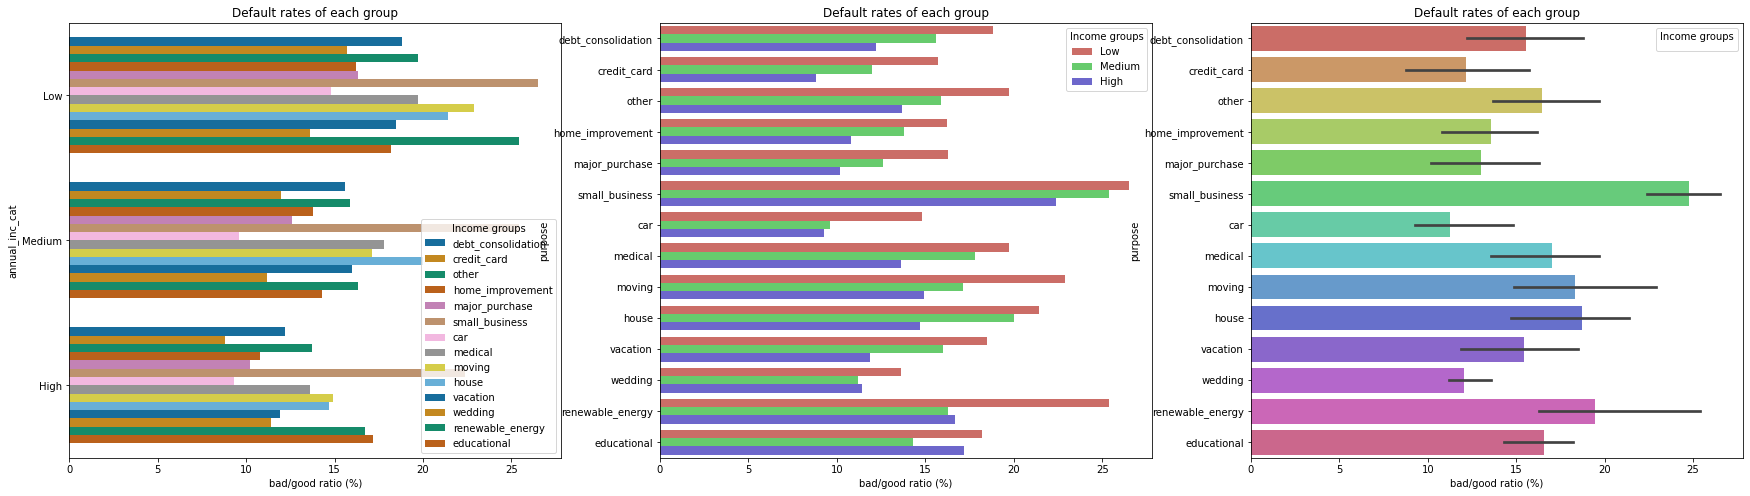

In [0]:
# create a table of default rates by income and puropse
# inspired by https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics

# create a blank form of groups
groups = loan_data.loc[:, ["annual_inc_cat", "purpose", ]].copy()
blank = pd.DataFrame(groups.groupby(["annual_inc_cat", "purpose"]).count().apply(lambda x: 100 * x / int(x.sum())))
blank = blank.reset_index()

loan_count = loan_data.groupby(['annual_inc_cat', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts()).reset_index()
loan_count = loan_count.rename(columns = {"level_2": "loan_condition", "loan_condition":'count'})
loan_int = loan_data.groupby(['annual_inc_cat', 'purpose', 'loan_condition'])['int_rate'].mean().reset_index()
loan_amt = loan_data.groupby(['annual_inc_cat', 'purpose'])['loan_amnt'].sum().reset_index()

loan_c_df = pd.merge(loan_count, round(loan_int, 1),  how='left', left_on=['annual_inc_cat', 'purpose', 'loan_condition'], right_on = ['annual_inc_cat', 'purpose', "loan_condition"])

# separate into good/bad loans and rename columns
good_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "good"].sort_values(by="annual_inc_cat", ascending=True)
bad_loans  = loan_c_df.loc[loan_c_df['loan_condition'] == "bad" ].sort_values(by="annual_inc_cat", ascending=True)
good_loans = good_loans.rename(columns = {'count':'good_loan_count', 'loan_amnt':'good_loan_amnt', 'int_rate':'good_int_rate'}).drop(columns = 'loan_condition')
bad_loans  = bad_loans.rename (columns = {'count':'bad_loan_count' , 'loan_amnt':'bad_loan_amnt' , 'int_rate':'bad_int_rate' }).drop(columns = 'loan_condition')

# left merge to blank form 
new_df = pd.merge(blank, loan_amt,  how='left', left_on=['annual_inc_cat', 'purpose'], right_on = ['annual_inc_cat', 'purpose'])
new_df = pd.merge(new_df, good_loans,  how='left', left_on=['annual_inc_cat', 'purpose'], right_on = ['annual_inc_cat', 'purpose'])
new_df = pd.merge(new_df, bad_loans,  how='left', left_on=['annual_inc_cat', 'purpose'], right_on = ['annual_inc_cat', 'purpose'])

# replace NA with zeros and convert counts to integers
new_df = new_df.replace(np.nan, 0)
new_df[['bad_loan_count', 'good_loan_count']] = new_df[['bad_loan_count', 'good_loan_count']].astype('int64')

# create columns total_loan_count and share of bad loans, sort
new_df["total_loan_count"] = new_df.good_loan_count + new_df.bad_loan_count
new_df['bad/good ratio (%)'] = round(new_df.bad_loan_count / new_df.total_loan_count * 100, 1)
final_df = new_df
final_df['inc_cat_index'] = final_df.annual_inc_cat.replace(['High', 'Medium', 'Low'], [1, 2, 3])
final_df = new_df.sort_values(by=['inc_cat_index', 'loan_amnt'], ascending=[False, False])

# re-order columns
final_df = final_df[['annual_inc_cat', 'purpose', 'loan_amnt', 'good_loan_count', 'bad_loan_count',
                    'total_loan_count', 'good_int_rate', 'bad_int_rate', 'bad/good ratio (%)']]
final_df = final_df.reset_index(drop=True)
pd.options.display.float_format = '{:,.2f}'.format

# format style
final_df['loan_amnt']        = final_df.apply(lambda x: "{:20,.0f}".format(x['loan_amnt']), axis=1)
final_df['good_loan_count']  = final_df.apply(lambda x: "{:,}".format(x['good_loan_count']), axis=1)
final_df['bad_loan_count']   = final_df.apply(lambda x: "{:,}".format(x['bad_loan_count']), axis=1)
final_df['total_loan_count'] = final_df.apply(lambda x: "{:,}".format(x['total_loan_count']), axis=1)

# plotting default rates by group
plt.figure(figsize=(30, 8))
plt.subplot(1, 3, 1)
plot = sns.barplot(x="bad/good ratio (%)", y="annual_inc_cat", data=final_df, hue = "purpose", palette= "colorblind")
plot.legend(title="Income groups")
plot.set_title("Default rates of each group")

plt.subplot(1, 3, 2)
plot = sns.barplot(x="bad/good ratio (%)", y="purpose", data=final_df, hue = "annual_inc_cat", palette= "hls")#, palette = ['blue', "red", 'yellow'])
plot.legend(title="Income groups")
plot.set_title("Default rates of each group")

plt.subplot(1, 3, 3)
plot = sns.barplot(x="bad/good ratio (%)", y="purpose", data=final_df, palette= "hls")#, palette = ['blue', "red", 'yellow'])
plot.legend(title="Income groups")
plot.set_title("Default rates of each group")

# adding gradients to interests and bad loan ratio
final_df = final_df.style.background_gradient('coolwarm', axis = 0).format({"good_int_rate": "{:20,.1f}", 
                                                                            "bad_int_rate": "{:20,.1f}", 
                                                                            "bad/good ratio (%)": "{:20,.1f}"})
final_df

**The most standing out groups are small_business, moving, educational and debt consolidation.**


Text(0.5, 1.0, 'Bad loans by loan type and income group')

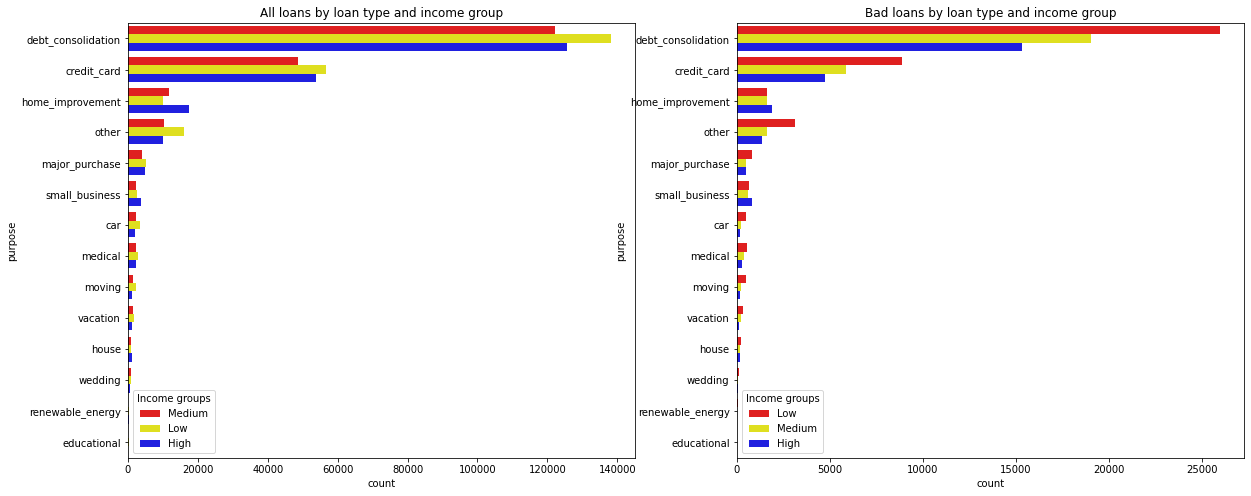

In [0]:
# Graphing the loan types

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)

g = sns.countplot(y="purpose", hue="annual_inc_cat", data=loan_data, 
              order = loan_data['purpose'].value_counts().index, palette = ["red", 'yellow', 'blue'])
g.legend(title="Income groups")
g.set_title("All loans by loan type and income group")

# Graphing the bad loan types
plt.subplot(1, 2, 2)

bad_loans = loan_data.loc[loan_data['loan_condition'] == 'bad', :]

g = sns.countplot(y="purpose", hue="annual_inc_cat", data=bad_loans, 
              order = loan_data['purpose'].value_counts().index, palette = ["red", 'yellow', 'blue'])
g.legend(title="Income groups")
g.set_title("Bad loans by loan type and income group")

***The spread of defaults is similar across all categories.***




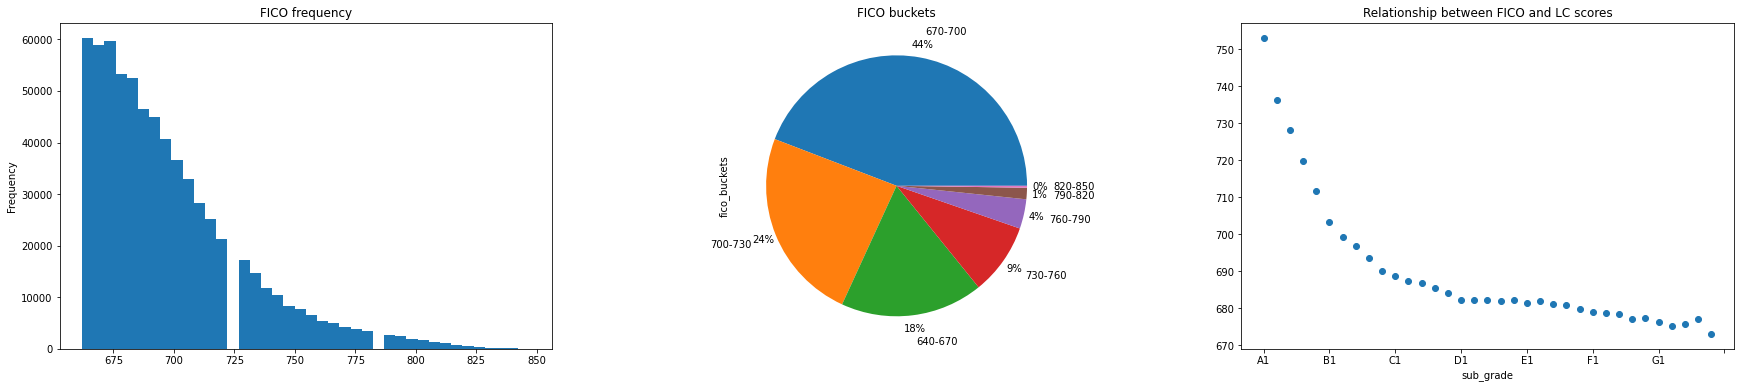

In [0]:
# FICO 
plt.figure(figsize=(30, 6))
plt.subplot(1, 3, 1)
loan_data.fico.plot.hist(title = 'FICO frequency', bins = 40)

plt.subplot(1, 3, 2)
loan_data.fico_buckets.value_counts().plot.pie(title = 'FICO buckets',
                                               autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

plt.subplot(1, 3, 3)
dat = loan_data.groupby(by = ['sub_grade'])['fico'].mean()
dat.plot.line(style='o', title = 'Relationship between FICO and LC scores')

**We see that FICO and LC scores align at higher qualities of borrowers, but do not any more in the lower quality half.**

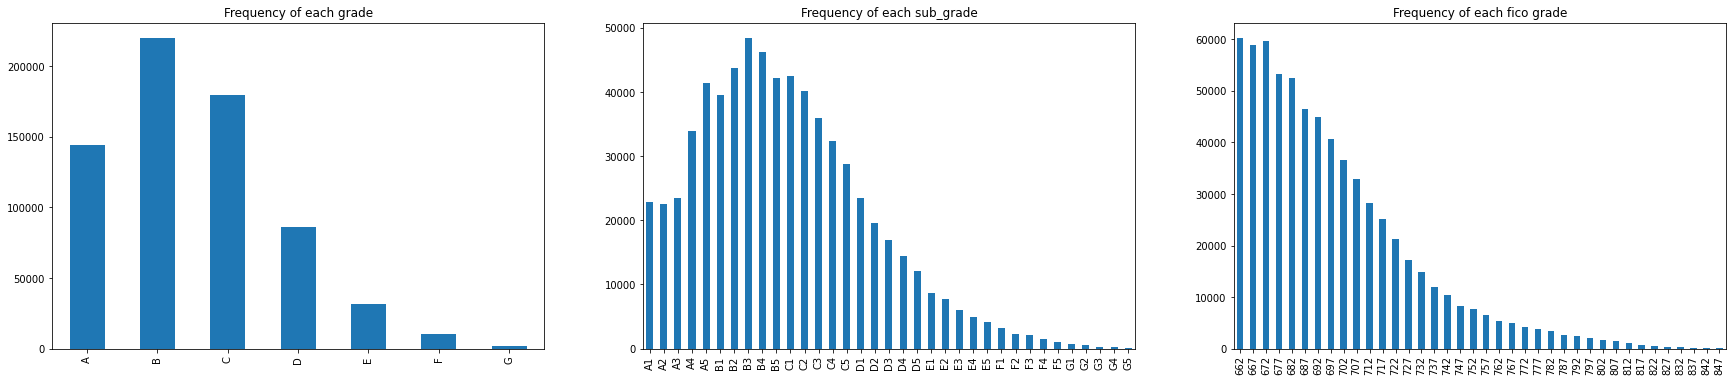

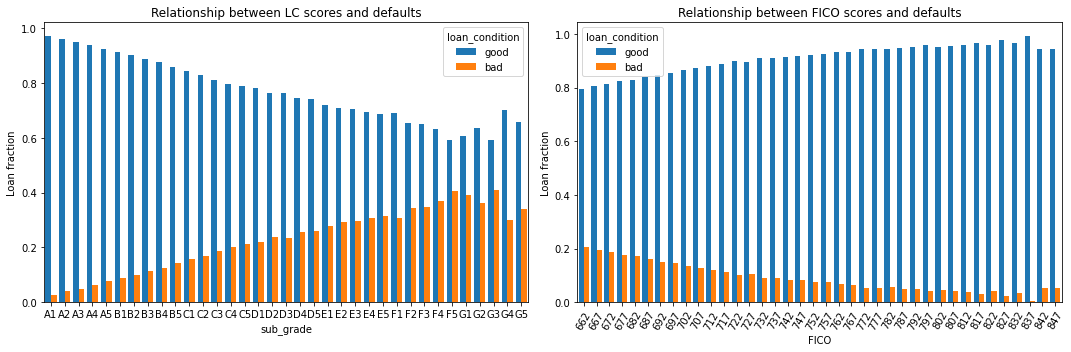

In [0]:
# LC grades vrsus FICO

plt.figure(figsize=(30, 6))
plt.subplot(1, 3, 1)
loan_data.grade.value_counts().sort_index(axis = 0).plot.bar(title = 'Frequency of each grade')
plt.subplot(1, 3, 2)
loan_data.sub_grade.value_counts().sort_index(axis = 0).plot.bar(title = 'Frequency of each sub_grade')

# numerical grades
plt.subplot(1, 3, 3)
loan_data.fico.value_counts().sort_index(axis = 0).plot.bar(title = 'Frequency of each fico grade')


f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data = loan_data.groupby('sub_grade')['loan_condition'].value_counts(normalize=True).to_frame('proportion').reset_index()        
sns.barplot(x = 'sub_grade', y = 'proportion', hue= "loan_condition", data = data, saturation=1, ax=ax1)
ax1.set_ylabel('Loan fraction')
ax1.set_title('Relationship between LC scores and defaults')
plt.xticks(rotation = 90)
ax1.set_xlabel('sub_grade')

data = loan_data.loc[:, ['loan_condition', 'fico']].groupby('fico')['loan_condition'].value_counts(normalize=True).to_frame('proportion').reset_index()
sns.barplot(x = 'fico', y = 'proportion', hue= "loan_condition", data = data, saturation=1, ax=ax2)
ax2.set_ylabel('Loan fraction')
ax2.set_title('Relationship between FICO scores and defaults')
plt.xticks(rotation = 60)
ax2.set_xlabel('FICO')
plt.tight_layout()

***It can be seen that LC's scoring is significantly outperforming FICO. LC can filter out very bad quality loans borrowers into lower categories where their average default rate reaches 50%. FICO goes signifficantly less steeper.***

## Correlations

In [0]:
# create dummies for objects
# taken from https://www.kaggle.com/pragyanbo/a-hitchhiker-s-guide-to-lending-club-loan-data#Cleaning-the-data

if calculate_corrs:

    from sklearn import preprocessing

    loan_data_cat = loan_data.copy()
    ### my approach
    # for var in ['loan_status', 'grade', 'sub_grade', 'fico_buckets', 'funded_amnt', 'funded_amnt_inv', 'bc_util', 'num_tl_op_past_12m', 'pub_rec_bankruptcies', 'mths_since_rcnt_il', 'bc_util', 'num_tl_op_past_12m']:
    ### Bastani approach:
    for var in ['loan_status', 'funded_amnt', 'funded_amnt_inv', 'bc_util', 'num_tl_op_past_12m', 'pub_rec_bankruptcies', 'mths_since_rcnt_il', 'bc_util', 'num_tl_op_past_12m']:
        if var in loan_data_cat.columns:
            loan_data_cat = loan_data_cat.drop(columns = var)

    count = 0
    for col in loan_data_cat:
        if loan_data[col].dtype == 'object':
            if len(list(loan_data_cat[col].unique())) <= 2:   
                le = preprocessing.LabelEncoder()
                loan_data_cat[col] = le.fit_transform(loan_data_cat[col])
                count += 1
                print (col)
                
    print('%d columns were binary encoded.\n' % count)
    print('number of categories in the "object" variables:\n', loan_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0), sep = "")       

    loan_data_cat = pd.get_dummies(loan_data_cat)
    print(loan_data_cat.shape)

In [0]:
# corr.to_csv('/content/drive/My Drive/AAA THESIS/Data/corrs_all_data.csv')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
### Uploading datasets to Drive
# !cp loan_data_cleaned_dummied.csv "/content/drive/My Drive/AAA THESIS/Data"
# !cp 'loan_data_cleaned.csv' "/content/drive/My Drive/AAA THESIS/Data"

In [0]:
# taken from https://github.com/msahamed/lending_loan_prediction/blob/master/eda.ipynb

if calculate_corrs:
    print(loan_data_cat.shape)
    %time corr = loan_data_cat.corr(method = 'spearman')
    fig, ax = plt.subplots(figsize=(25,25))
    sns.heatmap(corr, square=True, cmap="RdBu_r")

In [0]:
# correlations between features

if calculate_corrs:
    new_corr = corr.abs()
    new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
    new_corr.index.names = ['Var1']
    new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

    # correlation with target (defaults)
    corr_with_target = loan_data_cat.corrwith(loan_data_cat.loan_condition).abs().sort_values(ascending = False).to_frame('correlation_with_target').reset_index()
    unique_values = loan_data_cat.nunique().to_frame('unique_values').reset_index()
    corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner').rename(columns = {'index':'Var1'})

    together = pd.merge(new_corr, corr_with_unique, on = 'Var1', how = 'left')

    # new_corr[new_corr.correlation > 0.4]
    print(together[together.correlation > 0.4])

In [0]:
# Correlation with target variable
if calculate_corrs:
    print(corr_with_unique)
# corr_with_unique

In [0]:
# ## Saving datasets
# loan_data_cat.to_csv('loan_data_cleaned_dummied.csv')
# loan_data.to_csv('loan_data_cleaned.csv')

# ## Uploading datasets to Drive
# !cp loan_data_cleaned_dummied.csv "/content/drive/My Drive/AAA THESIS/Data"
# !cp loan_data_cleaned.csv "/content/drive/My Drive/AAA THESIS/Data"

## Examining each variable individually

In [0]:
# graphing approach inspired by https://github.com/msahamed/lending_loan_prediction

def var_summary(category, loan_data = loan_data, table = False, treat_as_cat = False):
    data = loan_data[-loan_data[category].isna()]
    
    col_name = category
    print(category)
    # if numeric, splits into 10 quantiles
    if (loan_data.dtypes[col_name]  in ['float64','float32','int64', "int32"]) & (treat_as_cat == False):
        data['quantiles'] = pd.qcut(data.loc[:, category], 10, duplicates = 'drop')
        category = 'quantiles'

    grouped = data.loc[:, [category, 'loan_condition', 'loan_amnt']].groupby([category, 'loan_condition']).count()

    bad = grouped.loc(axis=0)[:, "bad", :].rename(columns = {'loan_amnt':'bad_loans'})
    good = grouped.loc(axis=0)[:, "good", :].rename(columns = {'loan_amnt':'good_loans'})
    summary = pd.merge(bad.reset_index(drop=False).drop(columns = 'loan_condition'), good.reset_index(drop=False).drop(columns = 'loan_condition'), how = 'outer', on = category)
    summary['Loans_issued'] = summary.bad_loans + summary.good_loans
    summary['Default_rate'] = summary.iloc[:, 1]/summary.iloc[:, 2]

    summary = pd.concat([summary, data.groupby([category]).int_rate.mean().reset_index(drop=True)], axis = 1)
    summary = pd.concat([summary, data.groupby([category]).fico.mean().reset_index(drop=True)], axis = 1)
    summary = pd.concat([summary, data.groupby([category]).sub_grade_num.mean().reset_index(drop=True)], axis = 1)
    summary = summary.drop(columns = ['bad_loans', 'good_loans'])
    # summary = summary.sort_values('Default_rate')

    sns.set_style("whitegrid")
    f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize=(30, 5))

    sns.lineplot(x = summary[category].astype(str), y =  'Default_rate', data=summary, ax = ax1) # Default_rate
    ax1.set_ylabel('Default rates')
    ax1.set_title('Relationship between {} and default rates'.format(col_name))
    ax1.set_xlabel(col_name)
    ax1.set(ylim=(0.00, 0.6))

    # if numeric data
    if (loan_data.dtypes[col_name]  in ['float64','float32','int64', "int32"]) & (treat_as_cat == False):
        print('Treated as numerical')
        ax1.set_xticklabels(rotation = 45, labels = summary.quantiles)

        sns.distplot(data.loc[data[col_name].notnull(), col_name], ax=ax2, kde=False)
        ax2.set_ylabel('Count of observations')
        ax2.set_title('Distribution of {}'.format(col_name))

        sns.boxplot(x = col_name, y='loan_condition', data=data, ax=ax3)
        ax3.set_ylabel('Loan Condition')
        ax3.set_title('Difference in {} between defaulted and not'.format(col_name))
        try: 
            print('The correlation with default rate is: ', np.round(list(corr_with_unique.loc[corr_with_unique['Var1'] == col_name, 'correlation_with_target']), 2))
        except NameError:
            0
        else:
            print('The correlation with default rate is: ', np.round(list(corr_with_unique.loc[corr_with_unique['Var1'] == col_name, 'correlation_with_target']), 2))
        plt.close(2)

        if (col_name in loan_data_raw.columns) & (col_name != 'emp_length'):
            sns.distplot(loan_data_raw.loc[loan_data_raw[col_name].notnull(), col_name], ax=ax4, kde=False)
            ax4.set_ylabel('Count of observations')
            ax4.set_title('Distribution of {} in raw data'.format(col_name))
        print('Mean: {:3,.2f}; std dev: {:3,.2f}; zeros: {:,.0f}; min: {:3,.2f}; median: {:,.2f}; max: {:,.2f}\n'.format(
                                                                                loan_data[col_name].mean(),
                                                                                loan_data[col_name].std(),
                                                                                (loan_data[col_name] == 0).astype(int).sum(),
                                                                                loan_data[col_name].min(),
                                                                                loan_data[col_name].median(),
                                                                                loan_data[col_name].max()))    

    # if categorical data
    else:
        print("Treated as categorical")
        # to preserve order of grades but sort others by frequency
        if col_name in ['grade', 'sub_grade', 'emp_length', 'fico_buckets_bast']:  # , 'emp_length'
            order = sorted(data[col_name].unique())
        else:
            order = data[col_name].value_counts().index

        ax1.set_xticklabels(rotation=90, labels = summary[category])

        sns.countplot(data[col_name], order = order, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Count of observations')
        ax2.set_title('Distribution of {} categories'.format(col_name))
        ax2.set_xticklabels(rotation=90, labels = ax2.get_xticklabels())

        data = data.loc[:, ['loan_condition', col_name]].groupby(col_name, observed = True)['loan_condition'].value_counts(normalize=True).to_frame('proportion').reset_index().sort_values('proportion', ascending = False)
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_condition", data = data, saturation=1, ax=ax3 )
        ax3.set_ylabel('Loan Condition')
        ax3.set_title('Relationship between {} scores and defaults'.format(col_name))
        ax3.set_xticklabels(rotation=90, labels = ax3.get_xticklabels())

        if col_name in loan_data_raw.columns:
            sns.countplot(x = loan_data_raw.loc[loan_data_raw[col_name].notnull(), col_name], color='#5975A4', saturation=1, order = order,  ax = ax4)
            ax4.set_ylabel('Original count of observations')
            ax4.set_title('Distribution of {} categories in raw data'.format(col_name))
            ax4.set_xticklabels(rotation=90, labels = ax4.get_xticklabels())
        plt.close(2)

        # print correlations with target
        if treat_as_cat == True:
            if (col_name in loan_data_raw.columns) & (col_name != 'emp_length'):
                sns.distplot(loan_data_raw.loc[loan_data_raw[col_name].notnull(), col_name], ax=ax4)
                ax4.set_ylabel('Count of observations')
                ax4.set_title('Distribution of {} in raw data'.format(col_name))
            # for the case when correlation was not ran
            try:
                corr_with_unique.loc[corr_with_unique['Var1'] == col_name,:]
            except NameError:
                0
            else:
                print('The correlation with default rate is: ', np.round(list(corr_with_unique.loc[corr_with_unique['Var1'] == col_name, 'correlation_with_target']), 2))
            
            print('Mean: {:2,.2f}; std dev: {:,.2f}; zeros: {:,.0f}; min: {:,.2f}; median: {:,.2f}; max: {:,.2f}\n'.format(
                                                                                loan_data[col_name].mean(),
                                                                                loan_data[col_name].std(),
                                                                                (loan_data[col_name] == 0).astype(int).sum(),
                                                                                loan_data[col_name].min(),
                                                                                loan_data[col_name].median(),
                                                                                loan_data[col_name].max()))
        else:
            # for the case when correlation was not ran
            try:
                print(corr_with_unique.loc[corr_with_unique["Var1"].str.startswith(col_name), ['Var1',  'correlation_with_target']], '\n')
            except NameError:
                0
            else:
                print(corr_with_unique.loc[corr_with_unique["Var1"].str.startswith(col_name), ['Var1',  'correlation_with_target']], '\n')

    if col_name in loan_data_raw.columns:
        print("Share of NAs in raw data: {:.1f}%; total number: {:.0f}".format(loan_data_raw[col_name].isna().sum()/loan_data_raw.shape[0]*100, loan_data_raw[col_name].isna().sum()))
    else:
        print('Variable not in raw data, no 4th graph, no share of NAs can be given')
    #to silence the table
    if table == True:
        return(summary)
    else:
        return

# var_summary('delinq_2yrs', table = 1, treat_as_cat=1)
# var_summary('annual_inc', table = 1)
# var_summary('fico_buckets_bast', table = 1)  # categorical
# var_summary('grade', table = 1)  # categorical
# var_summary('cred_hist', table = 1)  # numeric
# var_summary('verification_status', table = 1)  # numeric

annual_inc
Treated as numerical
Mean: 72,139.69; std dev: 43,906.91; zeros: 0; min: 1,200.00; median: 61,000.00; max: 333,418.85

Share of NAs in raw data: 0.0%; total number: 0


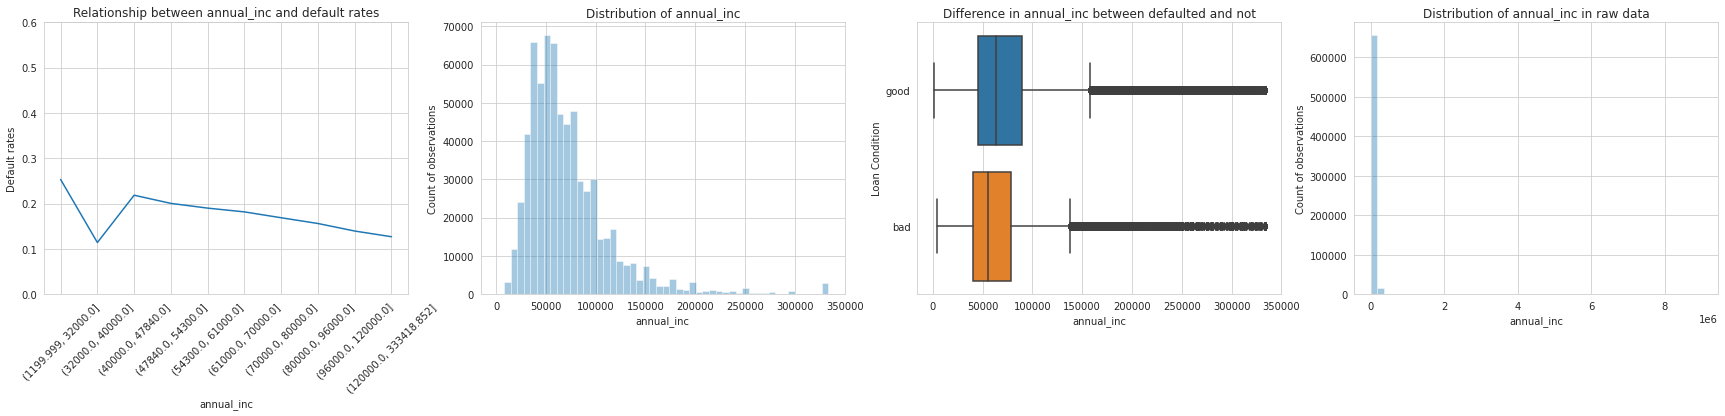

In [0]:
var_summary('annual_inc')

emp_length
Treated as categorical
Mean: 5.57; std dev: 3.81; zeros: 92,540; min: 0.00; median: 6.00; max: 10.00

Share of NAs in raw data: 5.6%; total number: 37579


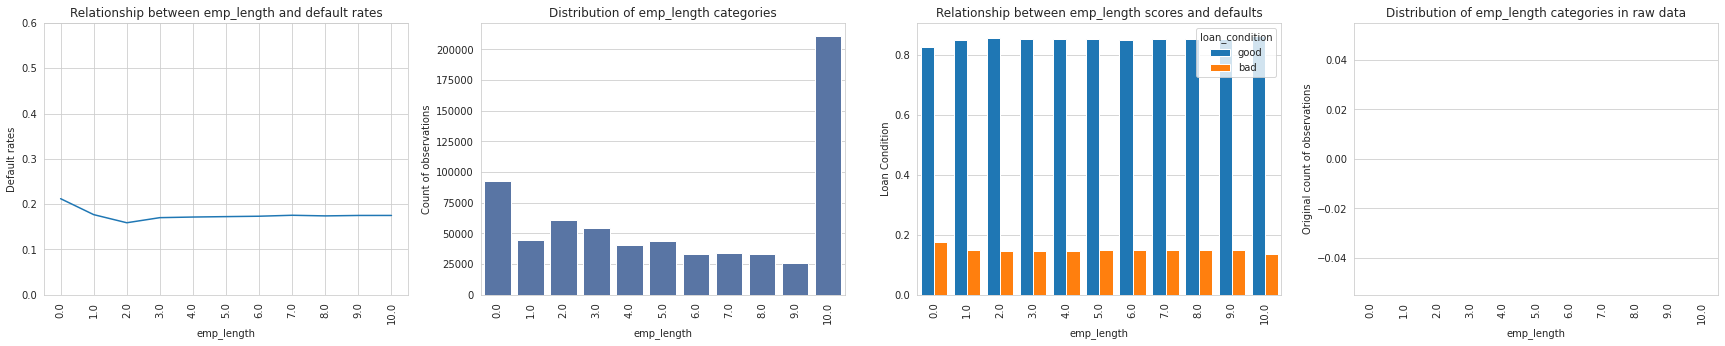

In [0]:
var_summary('emp_length', treat_as_cat=1)

cred_hist
Treated as numerical
Mean: 195.81; std dev: 91.18; zeros: 0; min: 36.50; median: 177.57; max: 562.43

Share of NAs in raw data: 0.0%; total number: 0


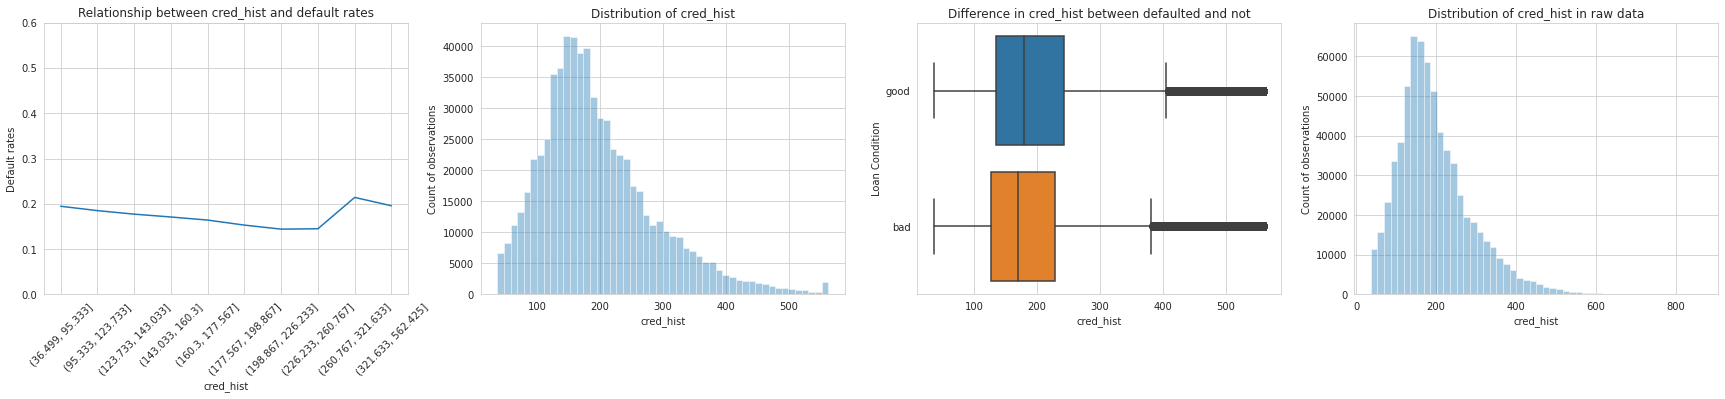

In [0]:
var_summary('cred_hist')

delinq_2yrs
Treated as categorical
Mean: 0.29; std dev: 0.70; zeros: 546,815; min: 0.00; median: 0.00; max: 3.73

Share of NAs in raw data: 0.0%; total number: 0


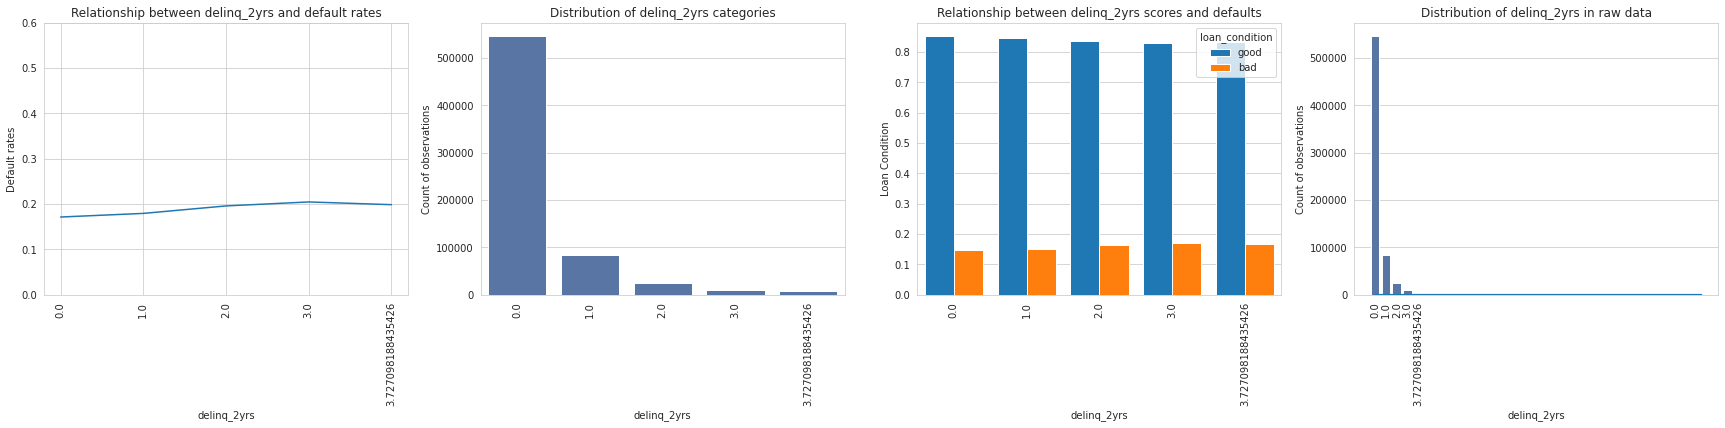

In [0]:
var_summary('delinq_2yrs', treat_as_cat=1)

inq_last_6mths
Treated as categorical
Mean: 0.70; std dev: 0.96; zeros: 373,618; min: 0.00; median: 0.00; max: 4.61

Share of NAs in raw data: 0.0%; total number: 0


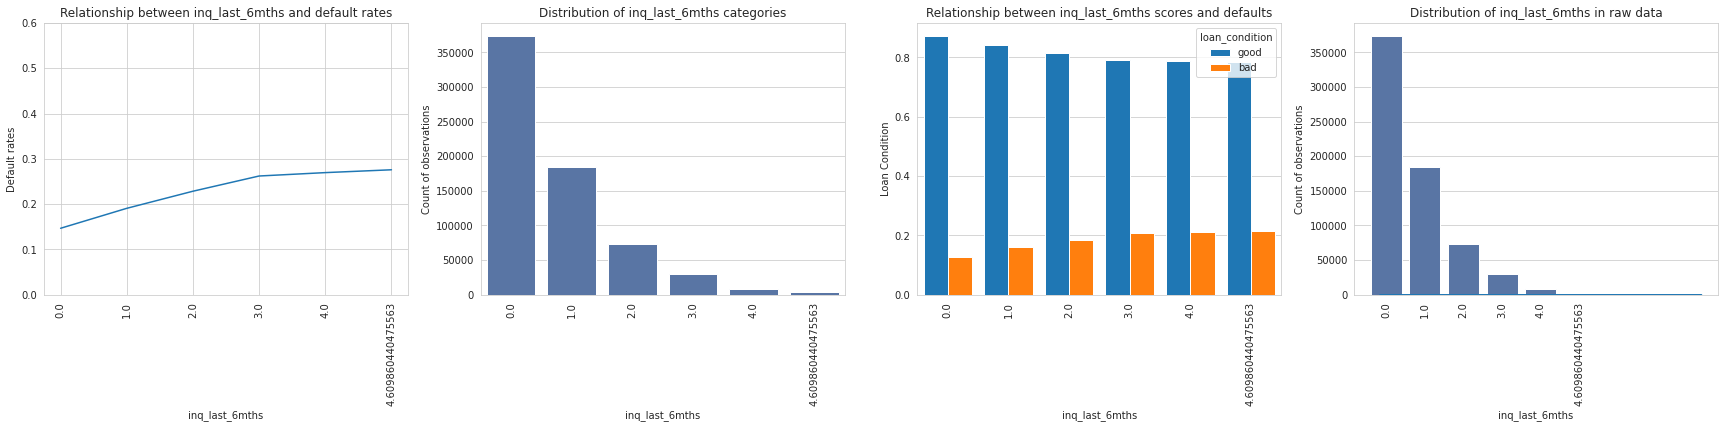

In [0]:
var_summary('inq_last_6mths', treat_as_cat=1)

pub_rec
Treated as categorical
Mean: 0.18; std dev: 0.47; zeros: 570,475; min: 0.00; median: 0.00; max: 2.56

Share of NAs in raw data: 0.0%; total number: 0


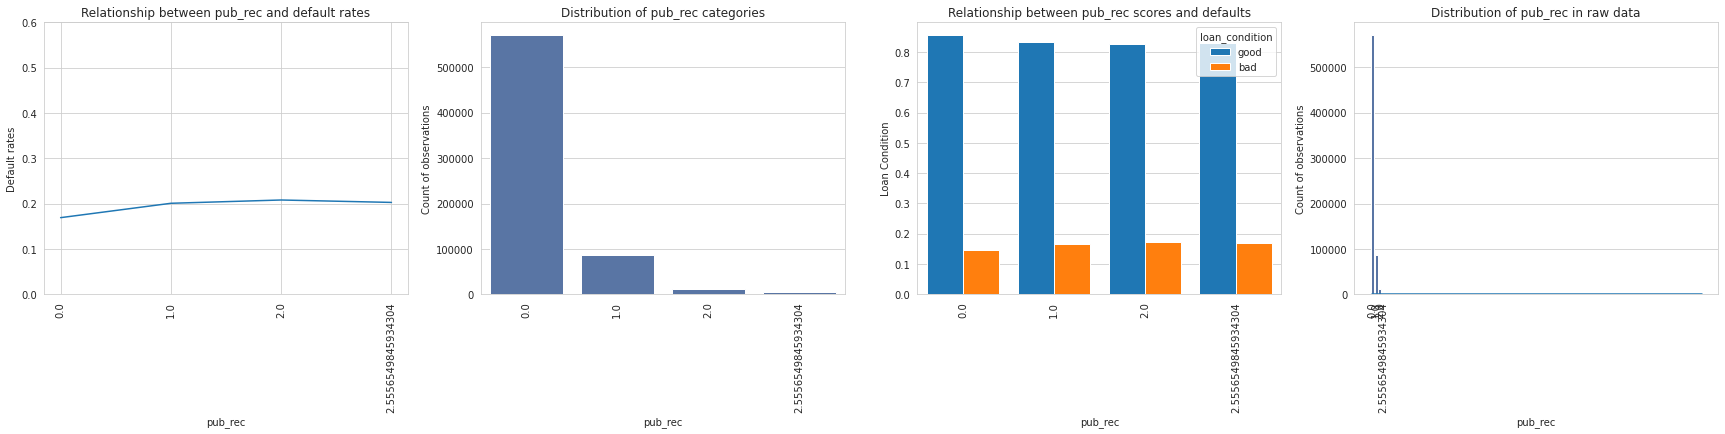

In [0]:
var_summary('pub_rec', treat_as_cat=1)

revol_util
Treated as numerical
Mean: 54.21; std dev: 23.91; zeros: 2,947; min: 0.00; median: 55.00; max: 149.96

Share of NAs in raw data: 0.1%; total number: 378


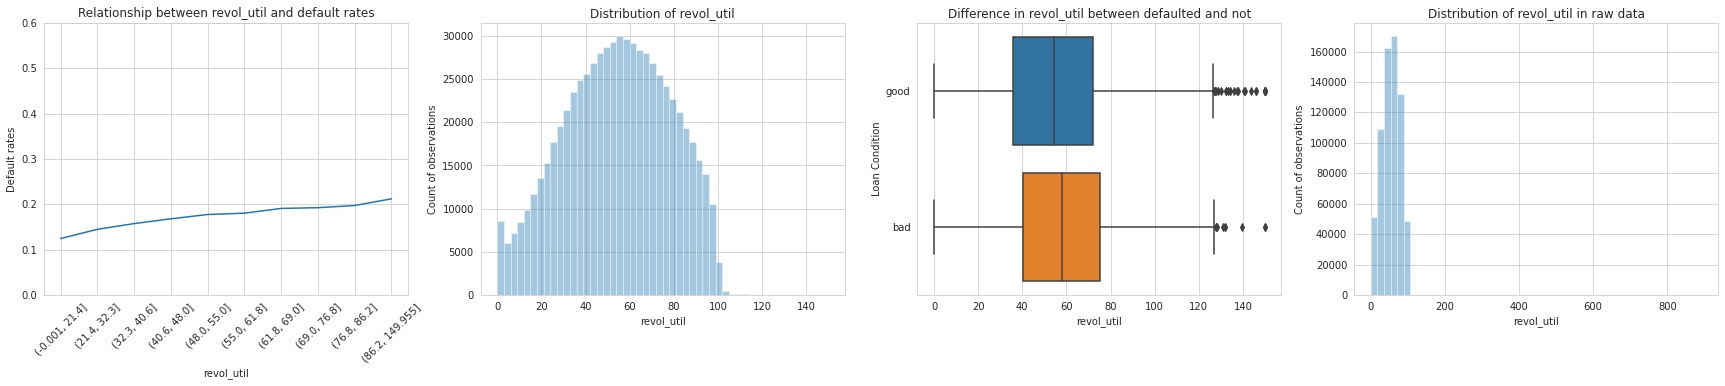

In [0]:
var_summary('revol_util')

open_acc
Treated as numerical
Mean: 11.24; std dev: 5.10; zeros: 6; min: 0.00; median: 10.00; max: 31.99

Share of NAs in raw data: 0.0%; total number: 0


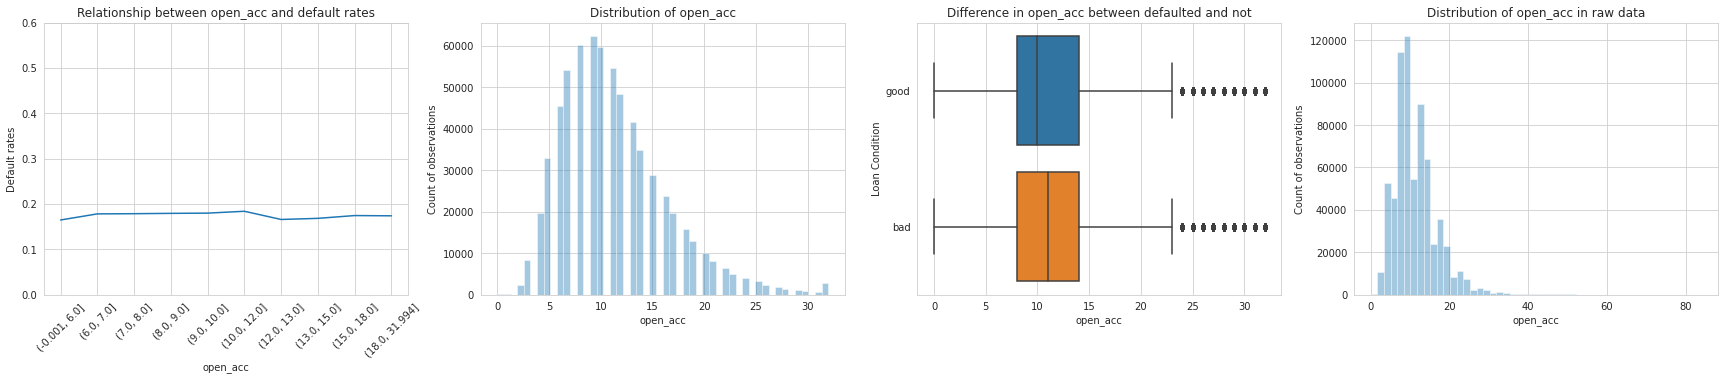

In [0]:
var_summary('open_acc')

mths_since_last_delinq
Treated as numerical
Mean: 16.51; std dev: 22.84; zeros: 349,805; min: 0.00; median: 0.00; max: 121.49

Share of NAs in raw data: 51.8%; total number: 348725


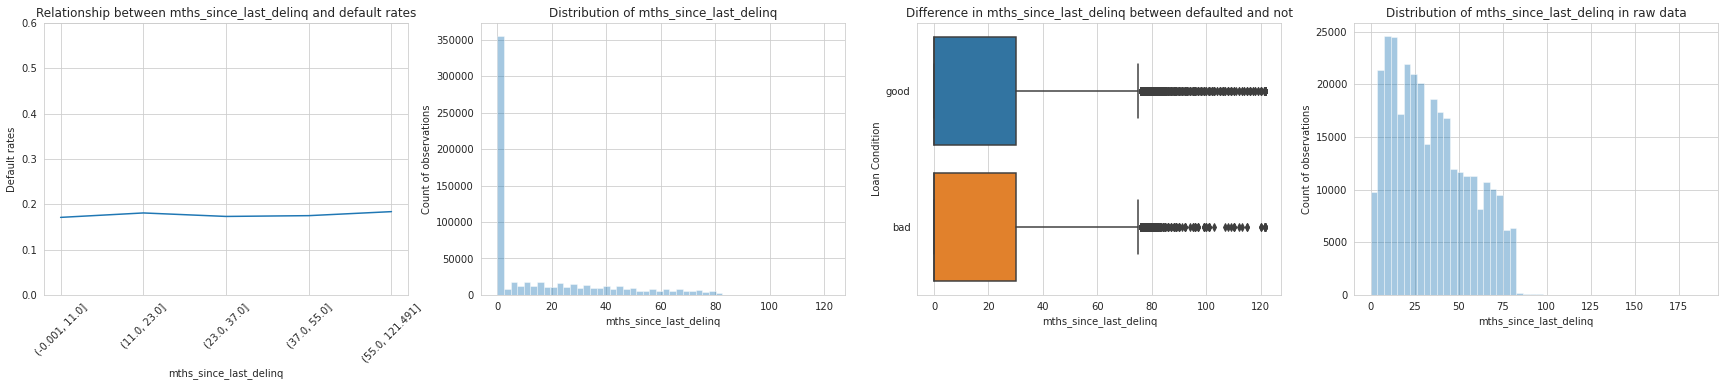

In [0]:
var_summary('mths_since_last_delinq')

loan_to_inc
Treated as numerical
Mean: 0.20; std dev: 0.11; zeros: 0; min: 0.00; median: 0.19; max: 1.50

Share of NAs in raw data: 0.0%; total number: 0


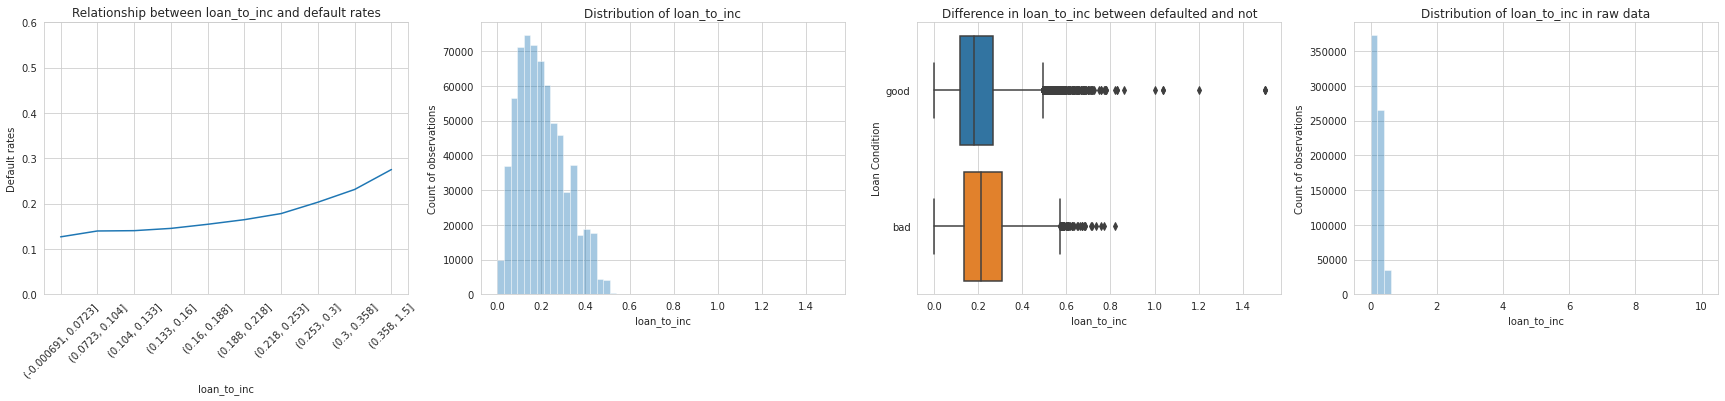

In [0]:
var_summary('loan_to_inc')

inst_to_inc
Treated as numerical
Mean: 0.08; std dev: 0.04; zeros: 0; min: 0.00; median: 0.07; max: 0.60

Share of NAs in raw data: 0.0%; total number: 0


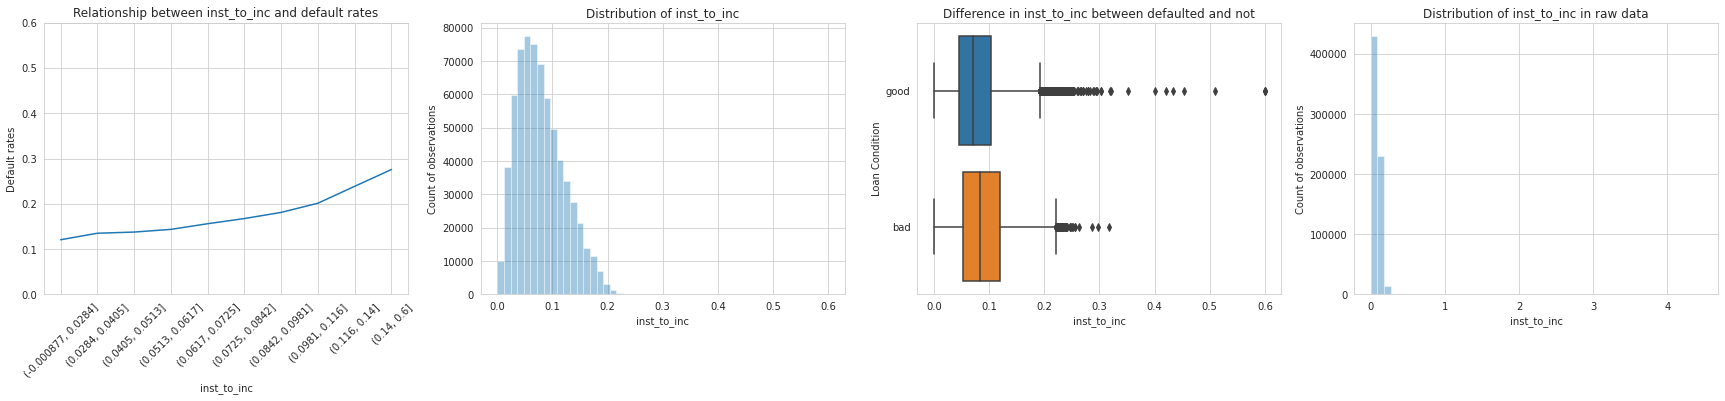

In [0]:
var_summary('inst_to_inc')

dti
Treated as numerical
Mean: 17.55; std dev: 8.18; zeros: 387; min: 0.00; median: 17.06; max: 50.79

Share of NAs in raw data: 0.0%; total number: 0


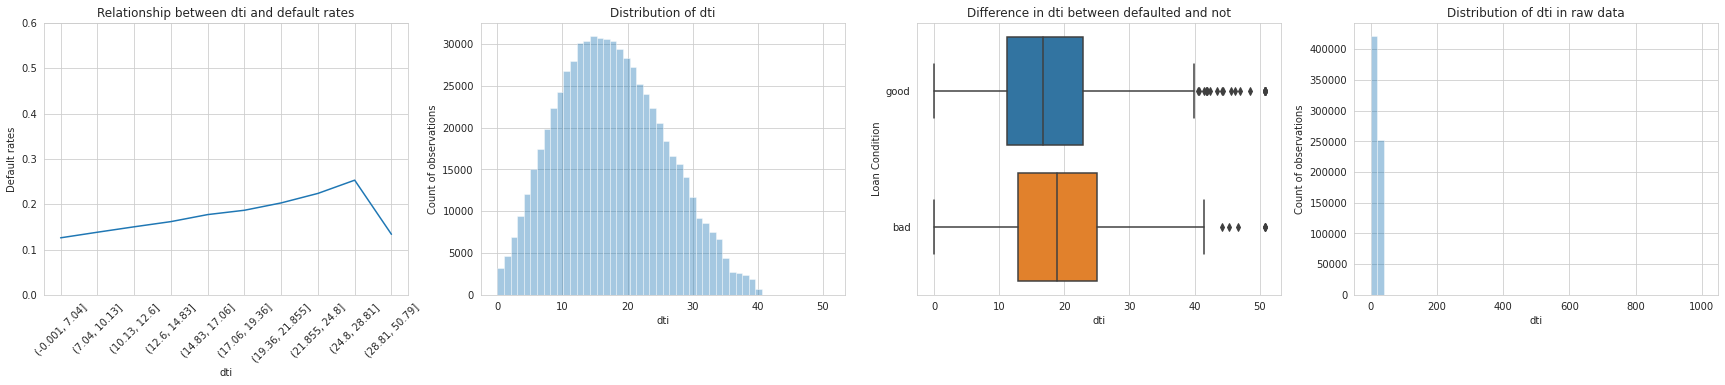

In [0]:
var_summary('dti')

grade
Treated as categorical
Share of NAs in raw data: 0.0%; total number: 0


,grade,Loans_issued,Default_rate,int_rate,fico,sub_grade_num
0,A,144130,0.06,7.22,726.73,3.34
1,B,219901,0.13,10.90,696.55,8.04
2,C,179618,0.22,14.08,686.77,12.80
3,D,86466,0.31,17.31,682.22,17.68
4,E,31617,0.42,20.20,681.28,22.62
5,F,10104,0.53,23.40,678.48,27.51
6,G,1870,0.60,24.87,675.77,32.20


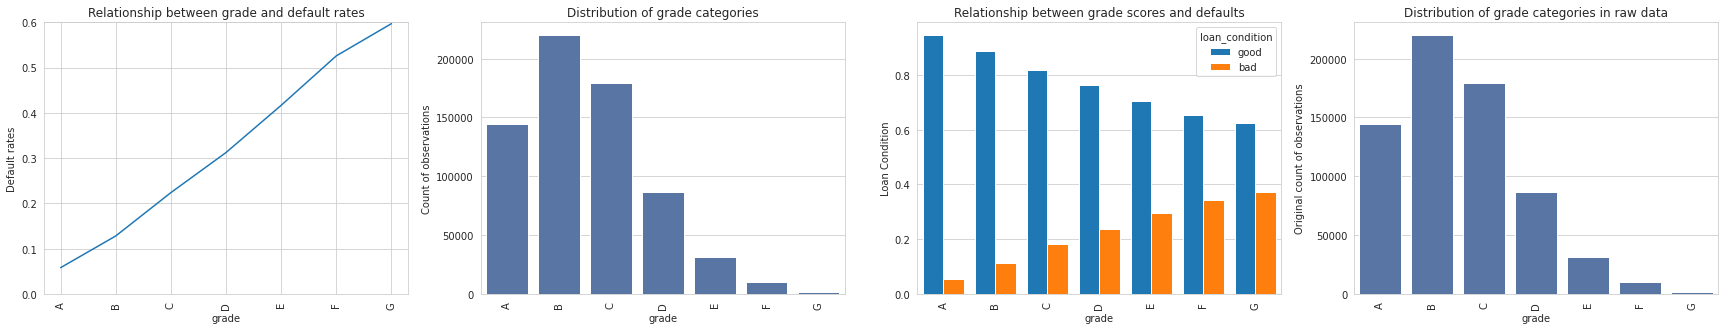

In [0]:
var_summary('grade', table = 1)

sub_grade
Treated as categorical
Share of NAs in raw data: 0.0%; total number: 0


,sub_grade,Loans_issued,Default_rate,int_rate,fico,sub_grade_num
0,A1,22912,0.03,5.71,753.15,1
1,A2,22473,0.04,6.43,736.28,2
2,A3,23445,0.05,7.14,728.06,3
3,A4,33847,0.07,7.53,719.86,4
4,A5,41453,0.08,8.29,711.82,5
5,B1,39470,0.10,9.02,703.36,6
6,B2,43667,0.11,10.06,699.36,7
7,B3,48379,0.13,11.01,696.93,8
8,B4,46157,0.14,11.86,693.55,9
9,B5,42228,0.17,12.33,690.13,10


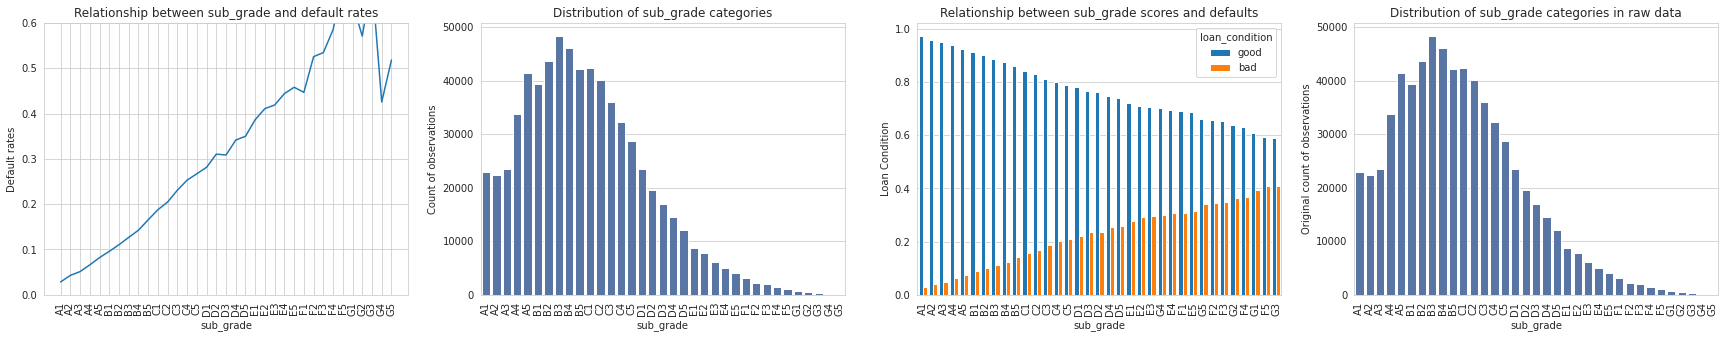

In [0]:
var_summary('sub_grade', table = 1)

purpose
Treated as categorical
Share of NAs in raw data: 0.0%; total number: 0


,purpose,Loans_issued,Default_rate,int_rate,fico,sub_grade_num
0,car,7787,0.13,11.53,710.59,9.37
1,credit_card,159086,0.14,11.08,696.70,8.55
2,debt_consolidation,386015,0.19,12.70,695.85,10.92
3,educational,326,0.21,11.65,716.14,10.14
4,home_improvement,39104,0.15,12.08,705.86,10.13
5,house,2991,0.23,15.05,707.28,14.43
6,major_purchase,14084,0.15,11.94,709.75,9.95
7,medical,7246,0.21,14.04,699.01,13.11
8,moving,4816,0.24,15.30,697.16,15.05
9,other,36384,0.20,14.53,698.16,13.80


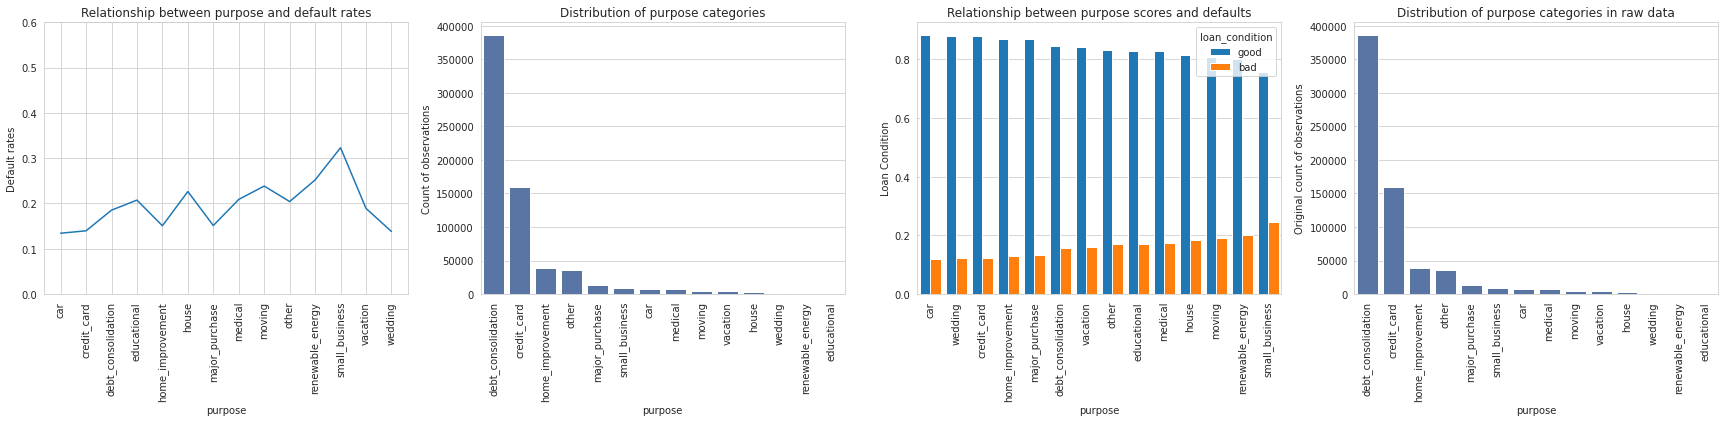

In [0]:
var_summary('purpose', table = 1)

fico_buckets_bast
Treated as categorical
Variable not in raw data, no 4th graph, no share of NAs can be given


,fico_buckets_bast,Loans_issued,Default_rate,int_rate,fico,sub_grade_num
0,"(640, 645]",nan,nan,nan,nan,nan
1,"(645, 650]",nan,nan,nan,nan,nan
2,"(650, 655]",nan,nan,nan,nan,nan
3,"(655, 660]",nan,nan,nan,nan,nan
4,"(660, 665]","60,223.00",0.26,14.63,662.00,14.01
5,"(665, 670]","58,855.00",0.24,14.42,667.00,13.62
6,"(670, 675]","59,732.00",0.23,14.16,672.00,13.16
7,"(675, 680]","53,334.00",0.21,13.88,677.00,12.69
8,"(680, 685]","52,453.00",0.21,13.49,682.00,12.02
9,"(685, 690]","46,542.00",0.19,13.22,687.00,11.60


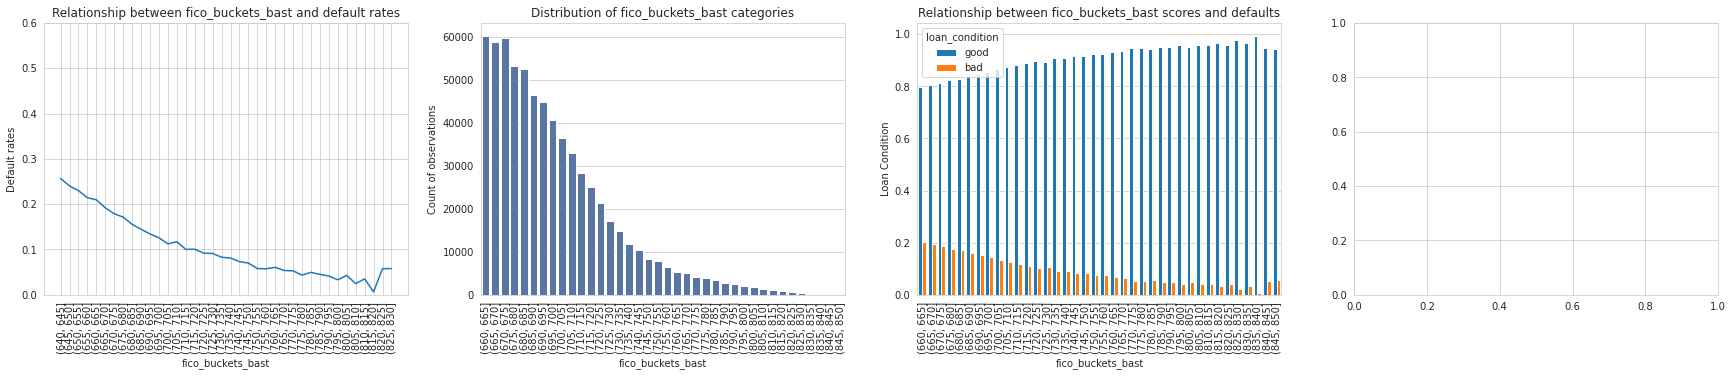

In [0]:
var_summary('fico_buckets_bast', table = 1)

home_ownership
Treated as categorical
Share of NAs in raw data: 0.0%; total number: 0


,home_ownership,Loans_issued,Default_rate,int_rate,fico,sub_grade_num
0,MORTGAGE,320862,0.14,12.04,701.44,9.94
1,OWN,66827,0.18,12.47,698.46,10.72
2,Other,191,0.22,13.59,706.03,11.97
3,RENT,285826,0.21,12.90,692.88,11.28


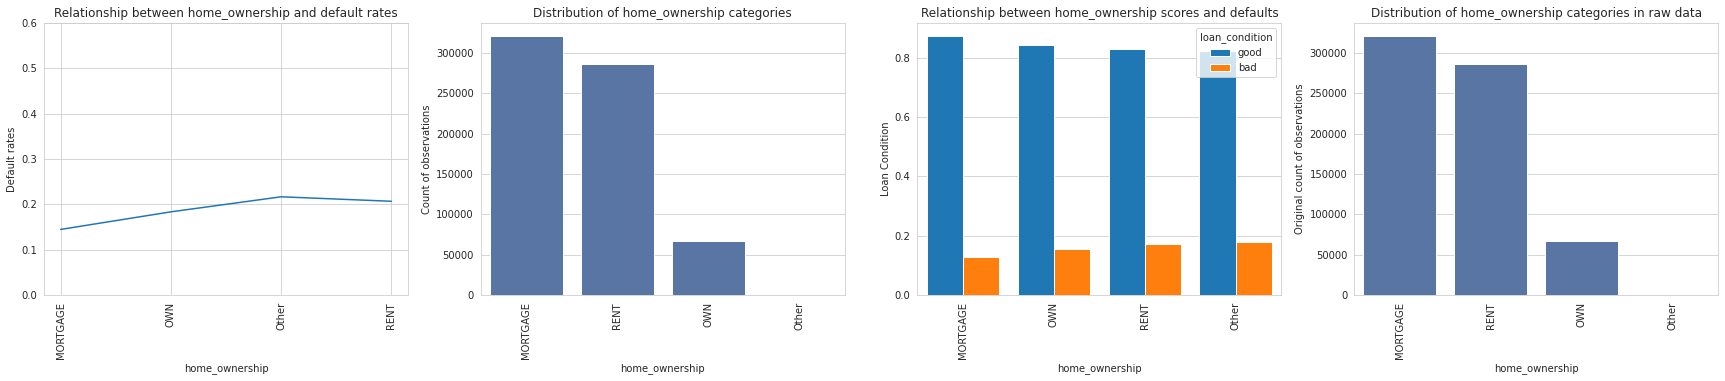

In [0]:
var_summary('home_ownership', table = 1)

inq_last_6mths_cat
Treated as categorical
Share of NAs in raw data: 0.0%; total number: 0


,inq_last_6mths_cat,Loans_issued,Default_rate,int_rate,fico,sub_grade_num
0,3+,41274,0.26,14.99,693.43,14.14
1,one,184890,0.19,13.00,695.22,11.35
2,two,73924,0.23,14.06,693.12,12.81
3,zero,373618,0.15,11.58,699.97,9.37


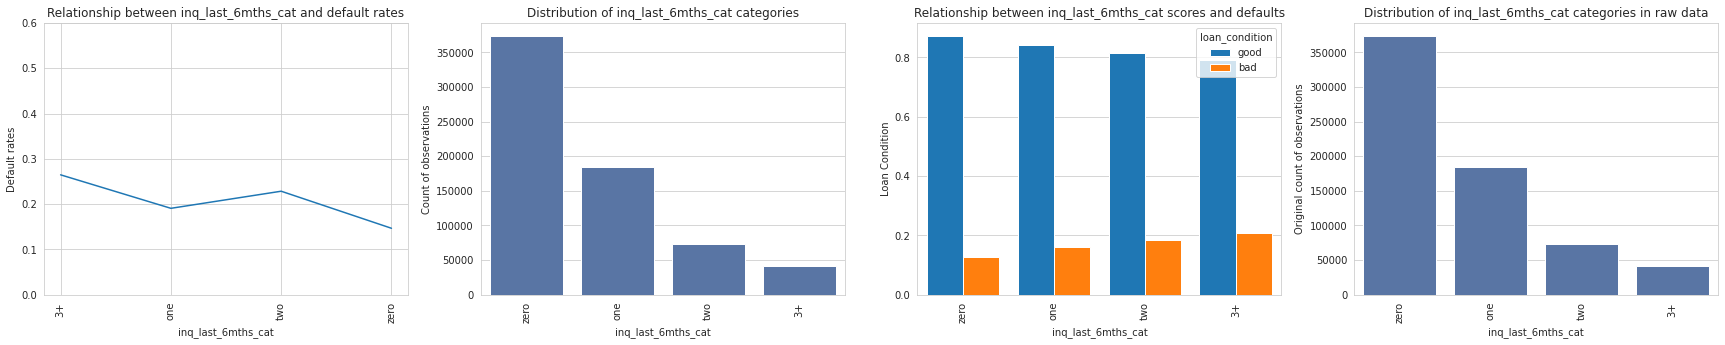

In [0]:
var_summary('inq_last_6mths_cat', table = 1)
# loan_data.inq_last_6mths_cat

inq_last_6mths
Treated as categorical
Mean: 0.70; std dev: 0.96; zeros: 373,618; min: 0.00; median: 0.00; max: 4.61

Share of NAs in raw data: 0.0%; total number: 0


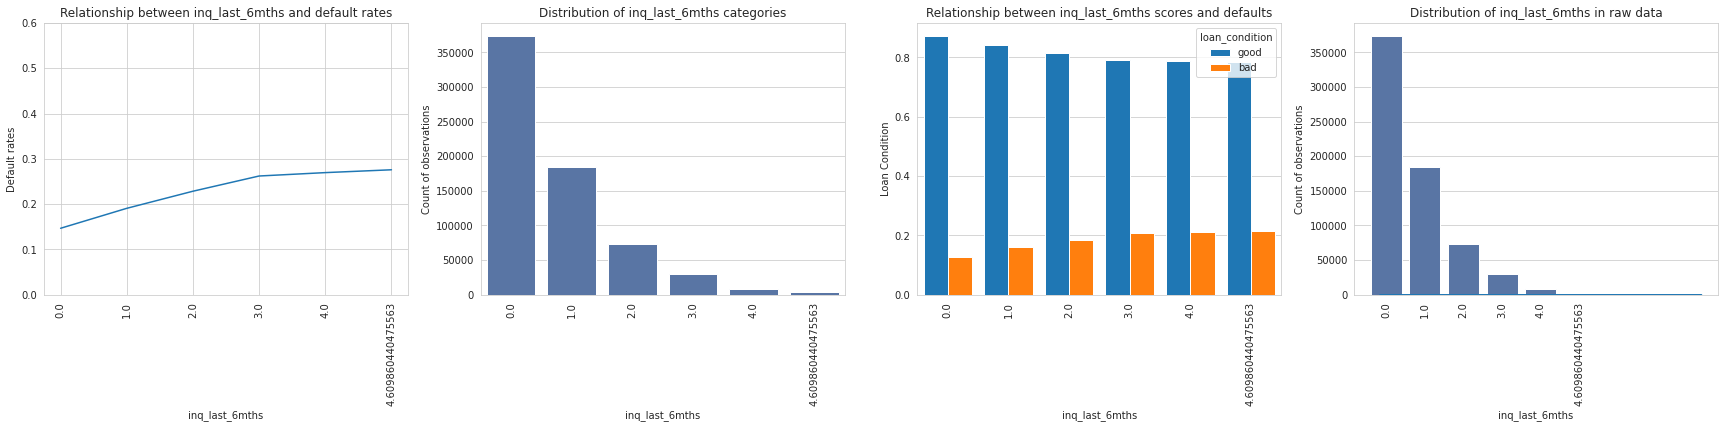

In [0]:
var_summary('inq_last_6mths', table = 0, treat_as_cat=1, loan_data=loan_data)

In [0]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,matured,emp_length_cat,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat,collections_12_mths_ex_med_cat,acc_now_delinq_cat,tot_coll_amt_cat,open_acc_6m_cat,open_il_12m_cat,open_il_24m_cat,open_rv_12m_cat,inq_fi_cat,total_cu_tl_cat,inq_last_12m_cat,chargeoff_within_12_mths_cat,delinq_amnt_cat,mort_acc_cat,num_accts_ever_120_pd_cat,num_tl_120dpd_2m_cat,num_tl_30dpd_cat,num_tl_90g_dpd_24m_cat,pub_rec_bankruptcies_cat,tax_liens_cat,cred_hist,loan_to_inc,inst_to_inc,emp_length_cat_reduced,annual_inc_cat,loan_condition,sub_grade_num,fico,fico_buckets,fico_buckets_bast
0,"3,600.00","3,600.00","3,600.00",36 months,13.99,123.03,C,C4,10.00,MORTGAGE,"55,000.00",Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.00,1.00,30.00,70.66,7.00,0.00,"2,765.00",29.70,13.00,w,0.00,30.00,Individual,0.00,722.00,"144,904.00","9,300.00",4.00,"20,701.00","1,506.00",37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,"178,050.00","7,746.00","2,400.00","13,734.00",Cash,y,10+ years,zero,one,zero,zero,zero,1+,1-2,zero,one,2+,2+,1-2,3+,zero,zero,1-2,2+,zero,zero,zero,zero,zero,150.17,0.07,0.03,10+ years,Medium,good,14,677,670-700,"(675, 680]"
1,"24,700.00","24,700.00","24,700.00",36 months,11.99,820.28,C,C1,10.00,MORTGAGE,"65,000.00",Not Verified,Fully Paid,small_business,SD,16.06,1.00,4.00,6.00,70.66,22.00,0.00,"21,470.00",19.20,38.00,w,0.00,0.00,Individual,0.00,0.00,"204,396.00","111,800.00",4.00,"9,733.00","57,830.00",27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,0.00,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,"314,017.00","39,475.00","79,300.00","24,667.00",Cash,y,10+ years,one,3+,zero,zero,zero,zero,1-2,zero,one,2+,zero,zero,3+,zero,zero,3+,zero,zero,zero,zero,zero,zero,194.80,0.38,0.15,10+ years,Medium,good,11,717,700-730,"(715, 720]"
5,"11,950.00","11,950.00","11,950.00",36 months,13.44,405.18,C,C3,4.00,RENT,"34,000.00",Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.00,0.00,0.00,70.66,5.00,0.00,"8,822.00",68.40,6.00,w,0.00,0.00,Individual,0.00,0.00,"12,798.00","12,900.00",0.00,"2,560.00",844.00,91.00,0.00,0.00,334.37,54.00,32.00,32.00,0.00,36.00,0.00,6.89,0.00,0.00,2.00,3.00,2.00,2.00,2.00,4.00,4.00,3.00,5.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,"16,900.00","12,798.00","9,400.00","4,000.00",Cash,y,4 years,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,342.93,0.35,0.14,2-9 years,Low,good,13,692,670-700,"(690, 695]"
6,"20,000.00","20,000.00","20,000.00",36 months,9.17,637.58,B,B2,10.00,MORTGAGE,"180,000.00",Not Verified,Fully Paid,debt_consolidation,MN,14.67,0.00,0.00,49.00,70.66,12.00,0.00,"87,329.00",84.50,27.00,f,0.00,0.00,Individual,0.00,0.00,"360,358.00","94,200.00",6.00,"30,030.00",0.00,102.90,0.00,0.00,142.00,306.00,10.00,10.00,4.

In [0]:
# loan defaults
loan_data.loan_condition.value_counts()

good    573853
bad      99853
Name: loan_condition, dtype: int64

In [0]:
### Saving datasets
print(loan_data.shape)
print('The sample size was:',  sample_size, " and the non matured were removed:", remove_non_mat)

# if save:
#     # loan_data_cat.to_csv('loan_data_cleaned_dummied.csv')
#     loan_data.to_csv('loan_data_cleaned.csv')

#     ### Uploading datasets to Drive
#     # !cp loan_data_cleaned_dummied.csv "/content/drive/My Drive/AAA THESIS/Data"
#     !cp 'loan_data_cleaned.csv' "/content/drive/My Drive/AAA THESIS/Data"


print("/nTime to run the whole notebook is {} minutes".format(round((time.time()-start)/60, 2)))

(673706, 105)
The sample size was: all  and the non matured were removed: all
/nTime to run the whole notebook is 15.64 minutes


In [0]:
# loan_data.to_csv('/content/drive/My Drive/AAA THESIS/Data/loan_data_cleaned .csv')